<a href="https://colab.research.google.com/github/eldhosejoseph/thesis/blob/main/thesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

word link: https://essexuniversity-my.sharepoint.com/:w:/r/personal/ej23373_essex_ac_uk/_layouts/15/doc2.aspx?sourcedoc=%7B662A4E77-C405-427C-B638-3BE77C26C15D%7D&file=Datasets.docx&action=default&mobileredirect=true&DefaultItemOpen=1&ct=1716458088490&wdOrigin=OFFICECOM-WEB.MAIN.REC&cid=0d27486e-018b-4bd5-9607-f62c8b155336&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=f2e85dc2-29a6-4d10-932d-14c7c8a07a5c

====================**Open Neuro**===================================

https://openneuro.org/datasets/ds004511/versions/1.0.2

git: https://github.com/OpenNeuroDatasets/ds004511.git

====================**Dryad**=========================================

[Data from: A novel algorithm to enhance P300 in single trials: application to lie detection using F-score and SVM] : https://datadryad.org/stash/dataset/doi:10.5061/dryad.2qc64

paper: https://doi.org/10.1371/journal.pone.0109700

==**An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior**===========

Paper: https://www.nature.com/articles/s41597-024-03234-y :An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior

Pre-print: https://assets-eu.researchsquare.com/files/rs-2521275/v1_covered.pdf?c=1676412896

Supplementary Files: https://assets-eu.researchsquare.com/files/rs-2521275/v1/ee537dc92ed9e0bcb9e4ca87.pdf

Dataset: https://figshare.com/articles/dataset/An_EEG_Dataset_of_Neural_Signatures_in_a_Competitive_Two-Player_Game_Encouraging_Deceptive_Behavior/24760827/3

git: https://github.com/yiyuchen-lab/DeceptionGame

==========**LieWaves: dataset for lie detection based on EEG signals and wavelets**===

Paper: https://link.springer.com/article/10.1007/s11517-024-03021-2 : LieWaves: dataset for lie detection based on EEG signals and wavelets

Dataset: [https://data.mendeley.com/datasets/5gzxb2bzs2/2]


========An Electroencephalography Network and Connectivity Analysis for Deception in Instructed Lying Tasks========================

paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4332664/

data: https://figshare.com/articles/dataset/An_electroencephalography_network_and_connectivity_analysis_for_deception_in_instructed_lying_tasks/1266216

## Libraries and Packages

In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.5 MB/s eta 0:00:00


In [2]:
import mne
import os
import re
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

# Competitive Two Player Game- Deception Task

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path to the .mat file within a folder in Google Drive
mat_file_path = '/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/Preprocessed/Preprocessed/DecisionMaking/Player_sub01_Observer_sub02.mat'

# Load the .mat file
mat_contents = loadmat(mat_file_path)

In [5]:
#behavioral log data
beh_log=pd.read_csv("/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp/Player_sub01_Observer_sub02_Behavioral.txt", sep=" ", header=1, index_col=None)
beh_log

round trial  trial_type  card_num card_col(Blk[1]/Pur[2]/Blu[3])  \
1       1     L           3         3                            lie   
1       2     T           4         2                           true   
1       3     S           1         1                            lie   
1       4     S           4         1                           true   
1       5     S           4         1                           true   
..    ...   ...         ...       ...                            ...   
11     40     L           3         3                            lie   
11     41     L           3         3                            lie   
11     42     S           3         1                           true   
11     43     T           3         2                           true   
11     44     S           6         1                           true   

    player_response  player_input Obs_input(Lie[0]/Truth[1])   score  \
1                 4             0                      ['0',  '+10']   
1                 4             1                     ['+5',  '+10']   
1                 2             1                    ['+10',    '0']   
1                 4             1                     ['+5',  '+10']   
1                 4             0                     ['+5',    '0']   
..              ...           ...                        ...     ...   
11                4             0                      ['0',  '+10']   
11                4             1                    ['+10',    '0']   
11                3             0                     ['+5',    '0']   
11                3             1                     ['+5',  '+10']   
11                6             1                     ['+5',  '+10']   

     sub_rea   obs_rea  
1   2.060804  0.899339  
1   1.354787  0.482807  
1   0.932352  0.499496  
1   0.868851  1.166404  
1   0.980639  0.399647  
..       ...       ...  
11  0.933398  0.232951  
11  0.784780  0.232735  
11  0.650696  0.232914  
11  0.735949  0.232397  
11  0.872087  0.232451  

[484 rows x 11 columns]

In [6]:
#formating the above table correctly
m=44
n=range(1,12)
s=[num for num in n for _ in range(m)]
s[43]
data={
    'round':list(s),
    'trial':beh_log['round'],
    'trial_type':beh_log['trial'],
    'card_num':beh_log['trial_type'],
    'card_col(Blk[1]/Pur[2]/Blu[3])':beh_log['card_num'],
    'player_response':beh_log['card_col(Blk[1]/Pur[2]/Blu[3])'],
    'player_input':beh_log['player_response'],
    'Obs_input(Lie[0]/Truth[1])':beh_log['player_input'],
    'score_1':beh_log['Obs_input(Lie[0]/Truth[1])'],
    'score_2':beh_log['score'],
    'sub_rea':beh_log['sub_rea'],
    'obs_rea':beh_log['obs_rea']

}
beh_log_upd=pd.DataFrame(data, index=None)
beh_log_upd

round  trial trial_type  card_num  card_col(Blk[1]/Pur[2]/Blu[3])  \
1       1      1          L         3                               3   
1       1      2          T         4                               2   
1       1      3          S         1                               1   
1       1      4          S         4                               1   
1       1      5          S         4                               1   
..    ...    ...        ...       ...                             ...   
11     11     40          L         3                               3   
11     11     41          L         3                               3   
11     11     42          S         3                               1   
11     11     43          T         3                               2   
11     11     44          S         6                               1   

   player_response  player_input  Obs_input(Lie[0]/Truth[1])  score_1 score_2  \
1              lie             4                           0    ['0',  '+10']   
1             true             4                           1   ['+5',  '+10']   
1              lie             2                           1  ['+10',    '0']   
1             true             4                           1   ['+5',  '+10']   
1             true             4                           0   ['+5',    '0']   
..             ...           ...                         ...      ...     ...   
11             lie             4                           0    ['0',  '+10']   
11             lie             4                           1  ['+10',    '0']   
11            true             3                           0   ['+5',    '0']   
11            true             3                           1   ['+5',  '+10']   
11            true             6                           1   ['+5',  '+10']   

     sub_rea   obs_rea  
1   2.060804  0.899339  
1   1.354787  0.482807  
1   0.932352  0.499496  
1   0.868851  1.166404  
1   0.980639  0.399647  
..       ...       ...  
11  0.933398  0.232951  
11  0.784780  0.232735  
11  0.650696  0.232914  
11  0.735949  0.232397  
11  0.872087  0.232451  

[484 rows x 12 columns]

In [7]:
beh_log_upd['card_num'].unique()

array([3, 4, 1, 5, 6, 2])

In [8]:
#timestamp data
timestamp_log=pd.read_fwf("/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp/Player_sub01_Observer_sub02_Timestamp.txt",sep=" ", header=None)
timestamp_log

0                1  \
0     2018-08-30  14:56:39.321000   
1     2018-08-30  14:56:41.310000   
2     2018-08-30  14:56:41.664000   
3     2018-08-30  14:56:41.673000   
4     2018-08-30  14:56:52.459000   
...          ...              ...   
3946  2018-08-30  16:11:52.178000   
3947  2018-08-30  16:11:53.221000   
3948  2018-08-30  16:11:54.337000   
3949  2018-08-30  16:11:55.379000   
3950  2018-08-30  16:11:59.498000   

                                                  2  
0                      25.2757729933 init_cedruspad  
1                    27.2635283424 experiment_start  
2                             27.6184087797 welcome  
3                        27.6273959005 assignDevice  
4                         38.4134304448 colorScheme  
...                                             ...  
3946  4538.17704899 result_trial_observer_incorrect  
3947        4539.22062448 result_trial_point_status  
3948        4540.33624361 result_round_observer_win  
3949        4541.37831381 result_final_observer_win  
3950                   4545.49728022 experiment_end  

[3951 rows x 3 columns]

In [9]:
##formating the above table correctly

# Split the specific column
split_data = timestamp_log[2].str.split(' ', n=1, expand=True)

# Rename the split columns
split_data.columns = ['2', '3']

# Concatenate the original DataFrame with the split columns
timestamp_log_n=timestamp_log
timestamp_log_n.drop(columns=[2], inplace=True)
timestamp_log_upd = pd.concat([timestamp_log_n, split_data], axis=1)
timestamp_log_upd

0                1              2  \
0     2018-08-30  14:56:39.321000  25.2757729933   
1     2018-08-30  14:56:41.310000  27.2635283424   
2     2018-08-30  14:56:41.664000  27.6184087797   
3     2018-08-30  14:56:41.673000  27.6273959005   
4     2018-08-30  14:56:52.459000  38.4134304448   
...          ...              ...            ...   
3946  2018-08-30  16:11:52.178000  4538.17704899   
3947  2018-08-30  16:11:53.221000  4539.22062448   
3948  2018-08-30  16:11:54.337000  4540.33624361   
3949  2018-08-30  16:11:55.379000  4541.37831381   
3950  2018-08-30  16:11:59.498000  4545.49728022   

                                    3  
0                      init_cedruspad  
1                    experiment_start  
2                             welcome  
3                        assignDevice  
4                         colorScheme  
...                               ...  
3946  result_trial_observer_incorrect  
3947        result_trial_point_status  
3948        result_round_observer_win  
3949        result_final_observer_win  
3950                   experiment_end  

[3951 rows x 4 columns]

In [10]:
# Print the content keys
print("Keys in the .mat file:", mat_contents.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'observer', 'player'])


In [11]:
# Print the keys and their corresponding values
for key in mat_contents:
    print(key, mat_contents[key])

__header__ b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 20 12:39:53 2020'
__version__ 1.0
__globals__ []
observer [[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
            0.2064213 , -1.19021237],
          [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
           -2.85086083, -3.78615451],
          [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
            0.91994894, -5.00700808],
          ...,
          [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
            2.02332449,  3.43227458],
          [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
            1.84405303,  1.1173979 ],
          [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
           -0.79820997, -1.3509593 ]],

         [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
            4.99834871,  3.29911351],
          [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
            

In [12]:
mat_contents['observer']

array([[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
                  0.2064213 , -1.19021237],
                [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
                 -2.85086083, -3.78615451],
                [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
                  0.91994894, -5.00700808],
                ...,
                [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
                  2.02332449,  3.43227458],
                [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
                  1.84405303,  1.1173979 ],
                [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
                 -0.79820997, -1.3509593 ]],

               [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
                  4.99834871,  3.29911351],
                [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
                  1.41069198,  2.57719851],
   

In [13]:
mat_contents['player']

array([[(array([[100]], dtype=uint8), array([[[-7.18764830e+00,  1.22919858e+00,  1.81678867e+00, ...,
                 -3.17998007e-02,  7.14602321e-03,  4.38691902e+00],
                [-6.71852255e+00,  1.22490931e+00,  2.86546040e+00, ...,
                  7.31438875e-01,  1.42970324e+00,  6.39665174e+00],
                [-5.53971100e+00, -1.23877919e+00,  7.66455460e+00, ...,
                  8.11694801e-01, -1.58020723e+00,  4.86925459e+00],
                ...,
                [-3.65176725e+00, -9.83069777e-01,  7.05432653e+00, ...,
                 -3.05836296e+00, -2.73539591e+00,  4.22301978e-01],
                [-4.28767014e+00, -6.27262235e-01,  3.57845688e+00, ...,
                 -2.18507266e+00,  2.50094247e+00,  1.80136287e+00],
                [-1.57916006e-02,  1.03468634e-02,  3.39718556e+00, ...,
                 -2.53226328e+00, -4.62264919e+00,  1.25445604e+00]],

               [[-5.54400253e+00, -1.55448639e+00, -3.51589417e+00, ...,
                 -5.55

In [14]:
observer_data=mat_contents['observer']
player_data=mat_contents['player']

In [15]:
#function to extract relevant eeg data
def eeg_data(data_arrays):
  # Flatten or reshape each sub-array as needed
  # Example: Extracting the EEG data and timestamps
  eeg_data = data_arrays[1]
  timestamps = data_arrays[5]

  # Create a DataFrame with the flattened data
  data_df = pd.DataFrame({
      'EEG_data': [eeg_data],
      'Timestamps': [timestamps]
  })
  return data_df
  # Display the DataFrame
  #print(data_df)

In [16]:
eeg_data(observer_data[0][0])

EEG_data  \
0  [[[11.73809814453125, -4.603399276733398, 4.17...   

                                          Timestamps  
0  [[-500, -490, -480, -470, -460, -450, -440, -4...

In [17]:
eeg_data(player_data[0][0])

EEG_data  \
0  [[[-7.187648296356201, 1.2291985750198364, 1.8...   

                                          Timestamps  
0  [[-500, -490, -480, -470, -460, -450, -440, -4...

In [18]:
#eeg heatmap

def eeg_heatmap(eeg_df):
  """

  Args:
    eeg_df:
  """
  # Extract EEG data and timestamps
  eeg_data = eeg_df.iloc[0][0]
  timestamps = eeg_df.iloc[0][1]

  # Reshape timestamps to match the shape of EEG data
  timestamps = np.squeeze(timestamps)

  # Plot EEG data
  plt.figure(figsize=(10, 6))
  plt.imshow(eeg_data[:, :, 0], aspect='auto', cmap='jet', extent=[timestamps[0], timestamps[-1], 0, 30])
  plt.colorbar(label='Amplitude')
  plt.xlabel('Time (ms)')
  plt.ylabel('Channel')
  plt.title('EEG Data')
  plt.show()

<ipython-input-18-bd2bc05dbaef>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-18-bd2bc05dbaef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


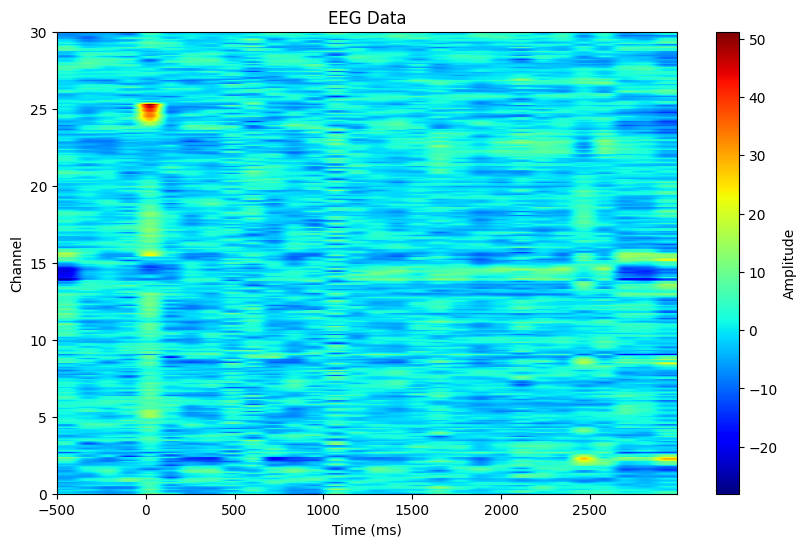

In [19]:
player_df=eeg_data(player_data[0][0])

eeg_heatmap(player_df)

<ipython-input-18-bd2bc05dbaef>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-18-bd2bc05dbaef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


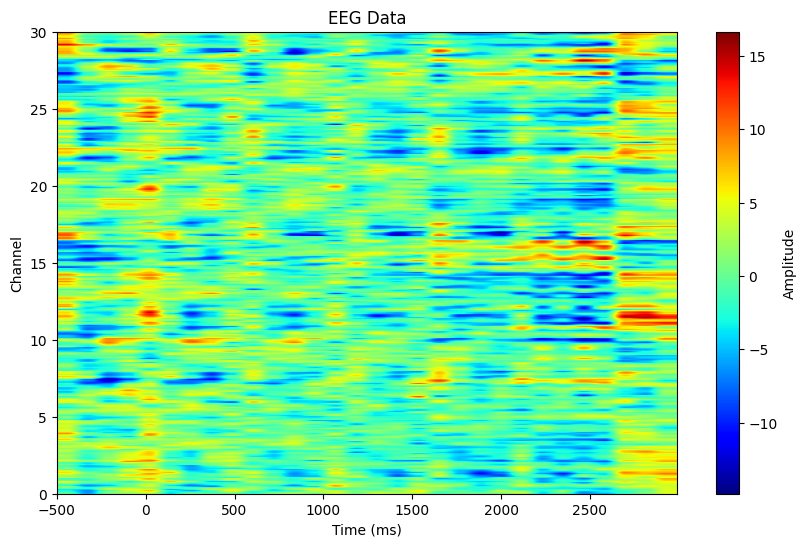

In [20]:
observer_df=eeg_data(observer_data[0][0])

eeg_heatmap(observer_df)

In [21]:


def eeg_channel(eeg_df, channel_num=0, subplots=0):
    # Extract EEG data and timestamps
    eeg_data = eeg_df.iloc[0][0]
    timestamps = eeg_df.iloc[0][1]

    # Reshape timestamps to match the shape of EEG data
    timestamps = np.squeeze(timestamps)

    # Plot EEG data for each channel separately
    if subplots==0:
      if (channel_num==0 or channel_num is None):
        num_channels = eeg_data.shape[1]
        plt.figure(figsize=(30, 15))
        for channel_idx in range(num_channels):
            plt.subplot(num_channels, 1, channel_idx + 1)
            plt.plot(timestamps, eeg_data[:, channel_idx, 0], color='b', linewidth=1)
            plt.xlabel('Time (ms)')
            plt.ylabel('Amplitude')
            plt.title(f'Channel {channel_idx + 1}')

        plt.tight_layout()
        plt.show()
      else:
        channel_idx = channel_num

        # Plot EEG data for the selected channel
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, eeg_data[:, channel_idx-1, 0], color='b', linewidth=1)
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
        plt.title(f'EEG Data - Channel {channel_idx }')
        plt.grid(True)
        plt.show()

    else:
          # Define the number of rows and columns for subplots
      num_rows = 10
      num_cols = 3

      # Create a figure and subplots
      fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

      # Flatten the axes array for easy iteration
      axes = axes.flatten()

      # Plot EEG data for each channel
      for i in range(len(axes)):
          channel_idx = i  # Use i to select the channel for each subplot
          axes[i].plot(timestamps, eeg_data[:, channel_idx, 0], color='b', linewidth=1)
          axes[i].set_xlabel('Time (ms)')
          axes[i].set_ylabel('Amplitude')
          axes[i].set_title(f'Channel {channel_idx + 1}')
          axes[i].grid(True)

      # Adjust layout and display
      plt.tight_layout()
      plt.show()

**PLAYER EEG**

<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]
<ipython-input-21-c50d62728d91>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


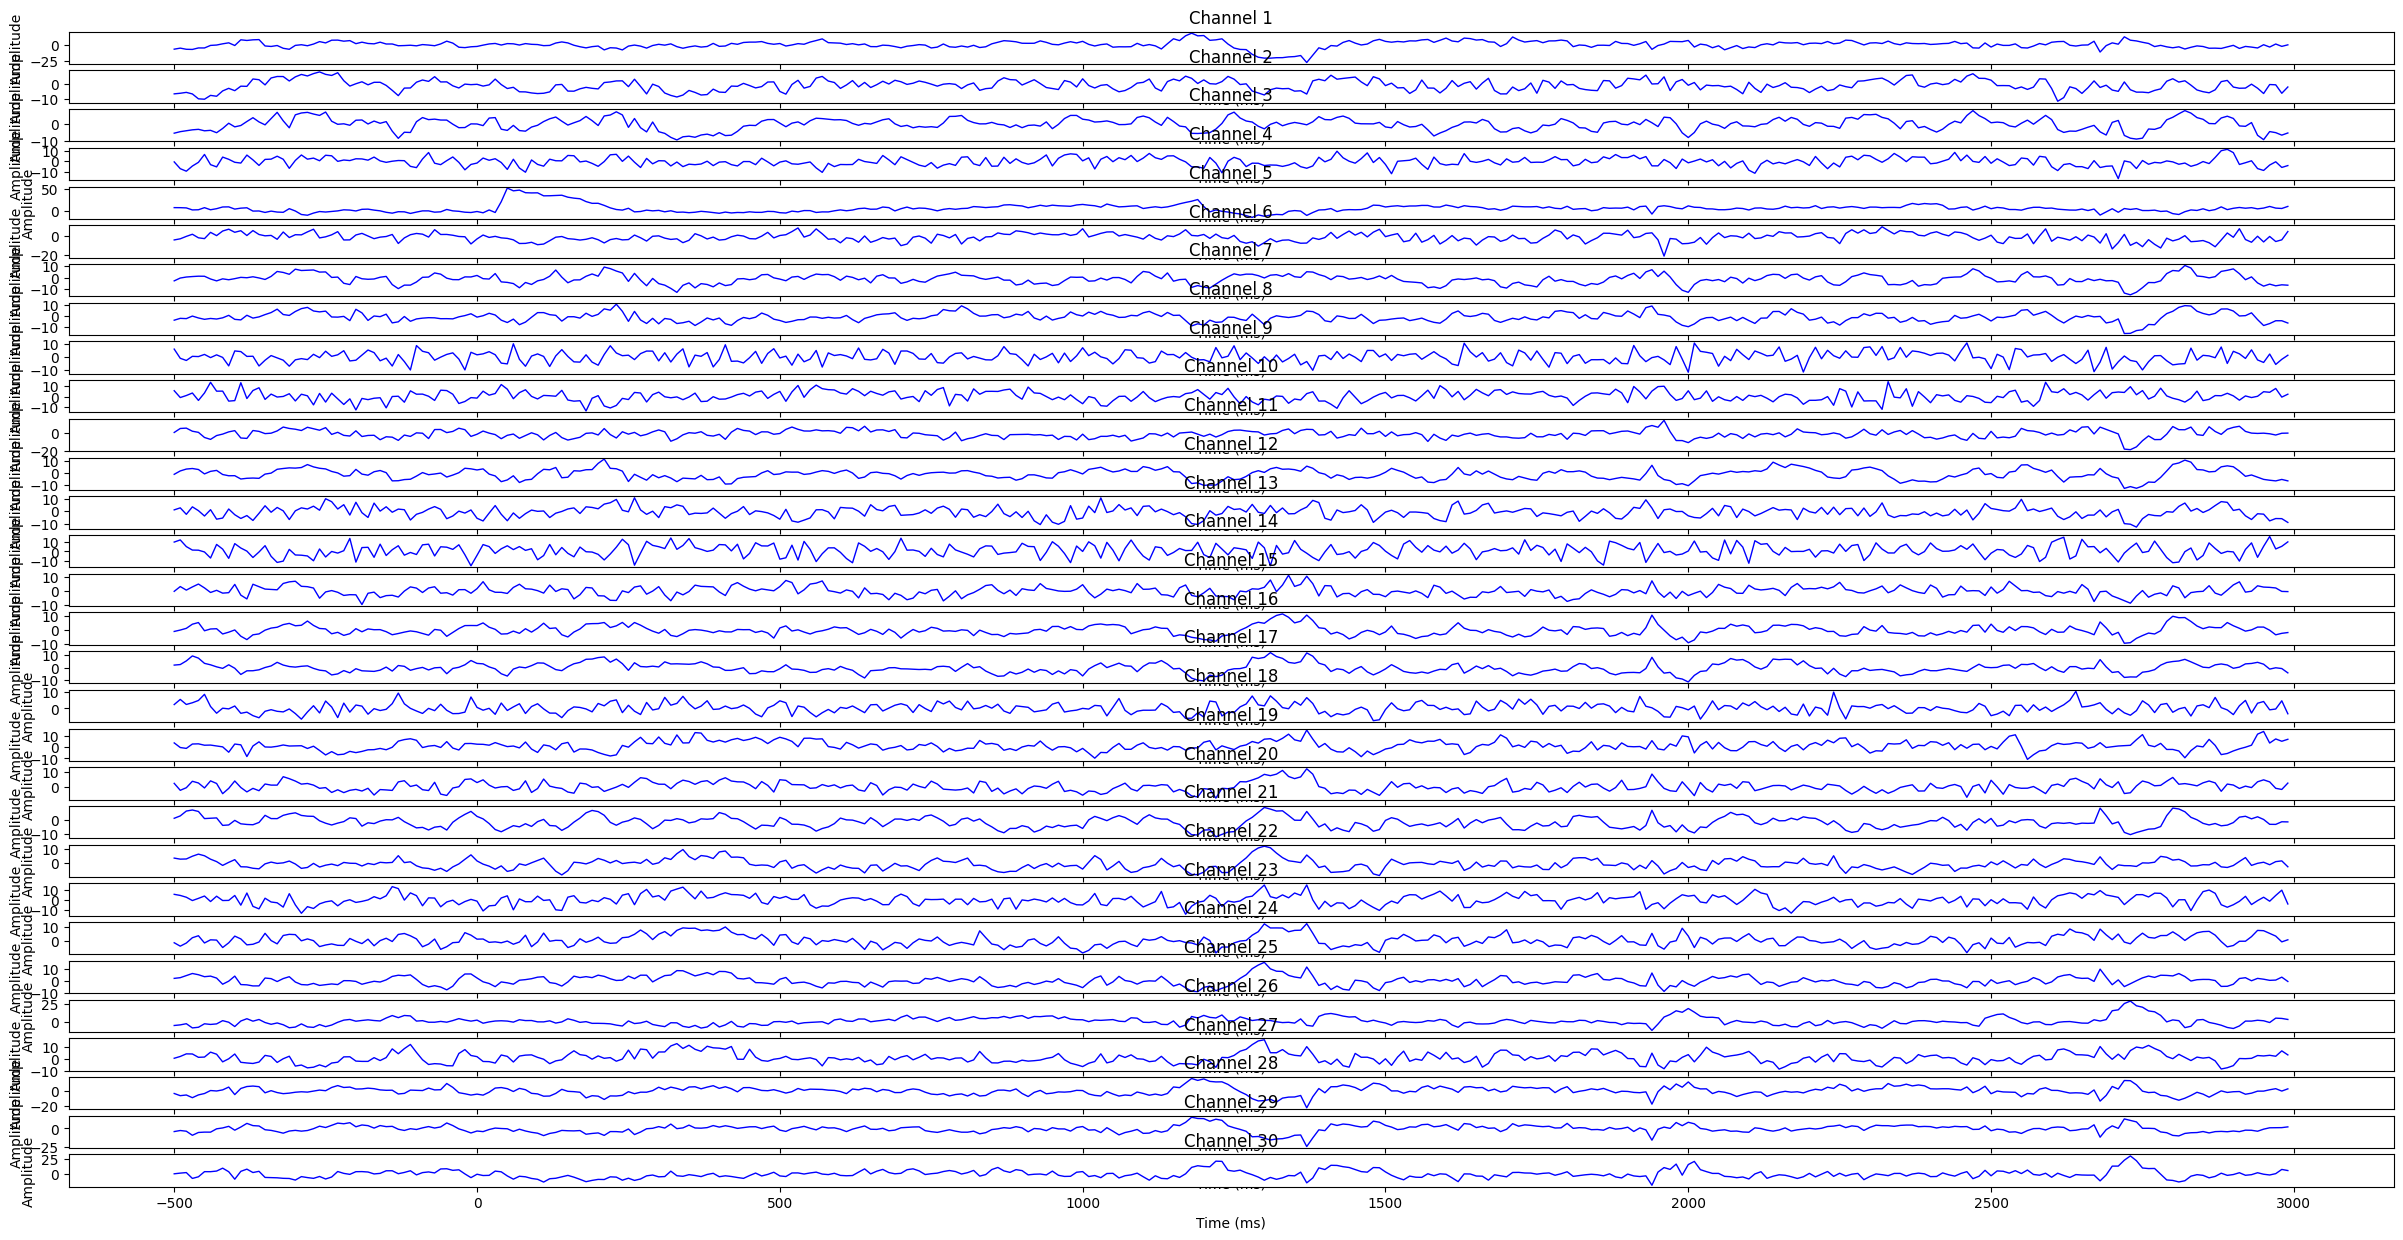

In [22]:
eeg_channel(player_df)

<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


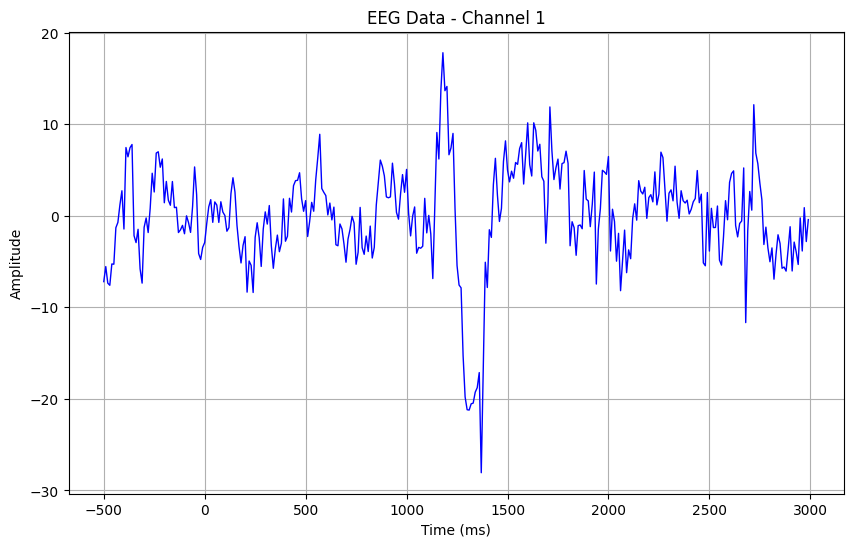

In [23]:
eeg_channel(player_df, 1)

<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


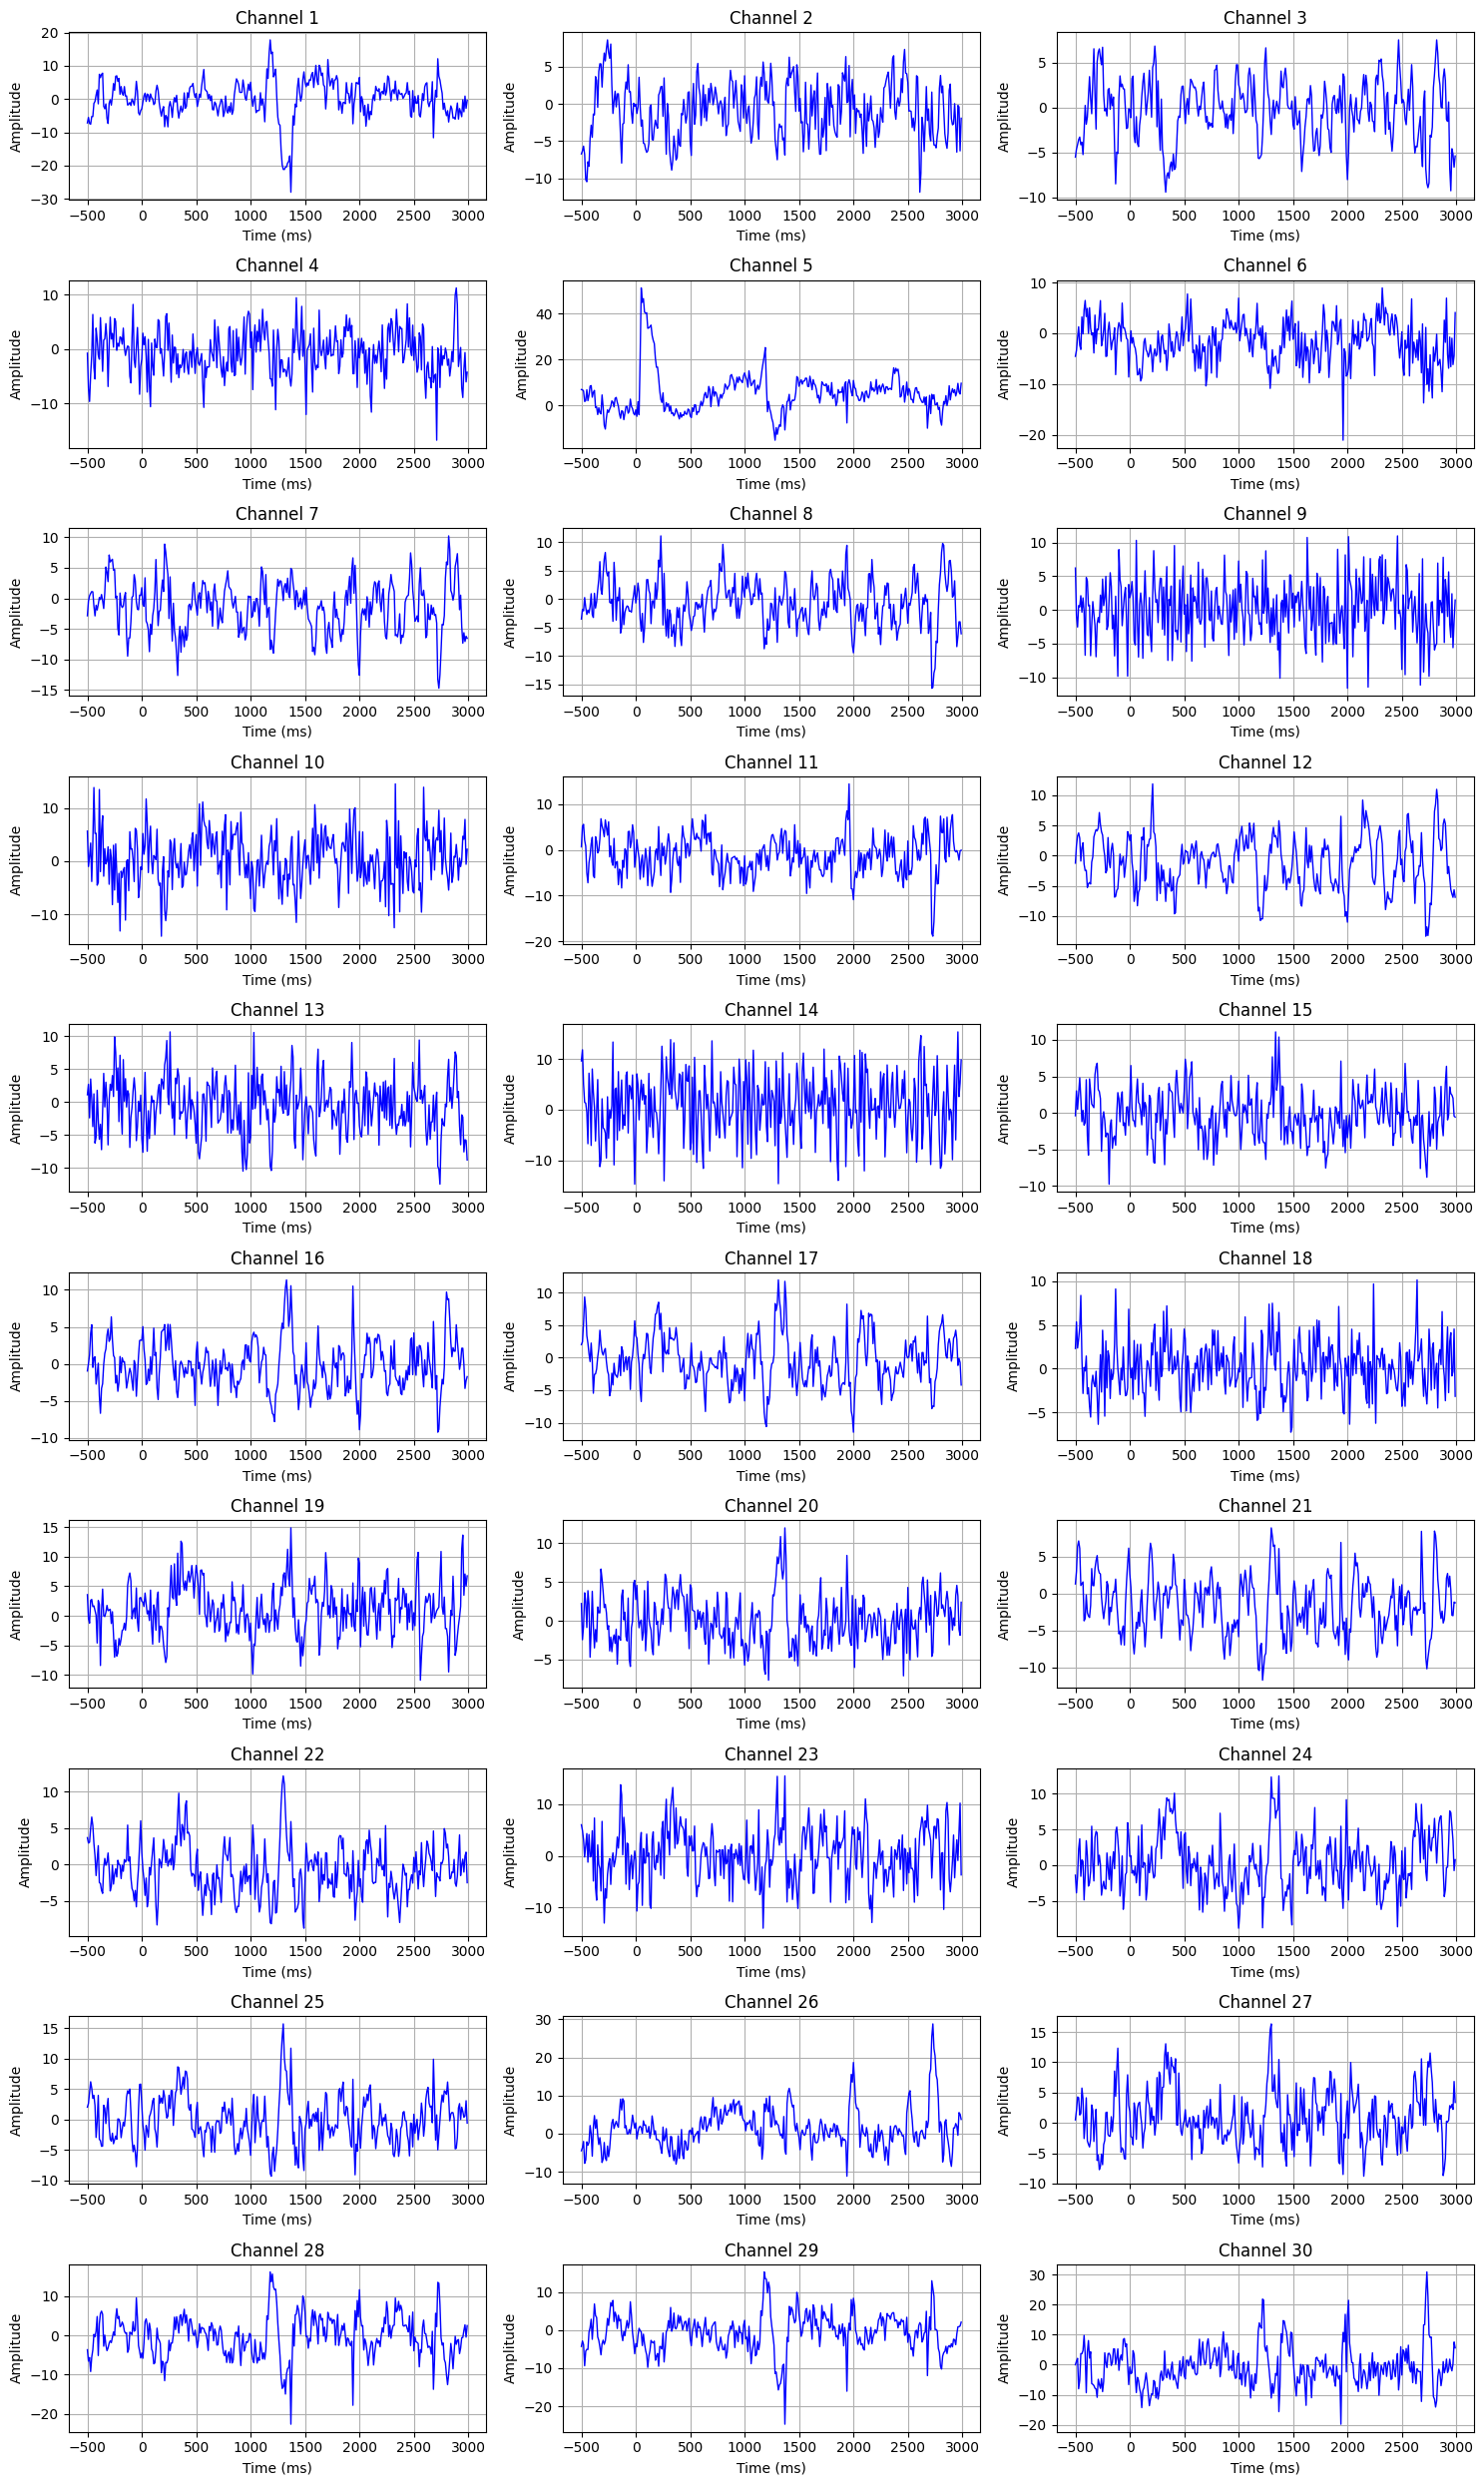

In [24]:
eeg_channel(player_df, subplots=1)

**OBSERVER EEG**

<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]
<ipython-input-21-c50d62728d91>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


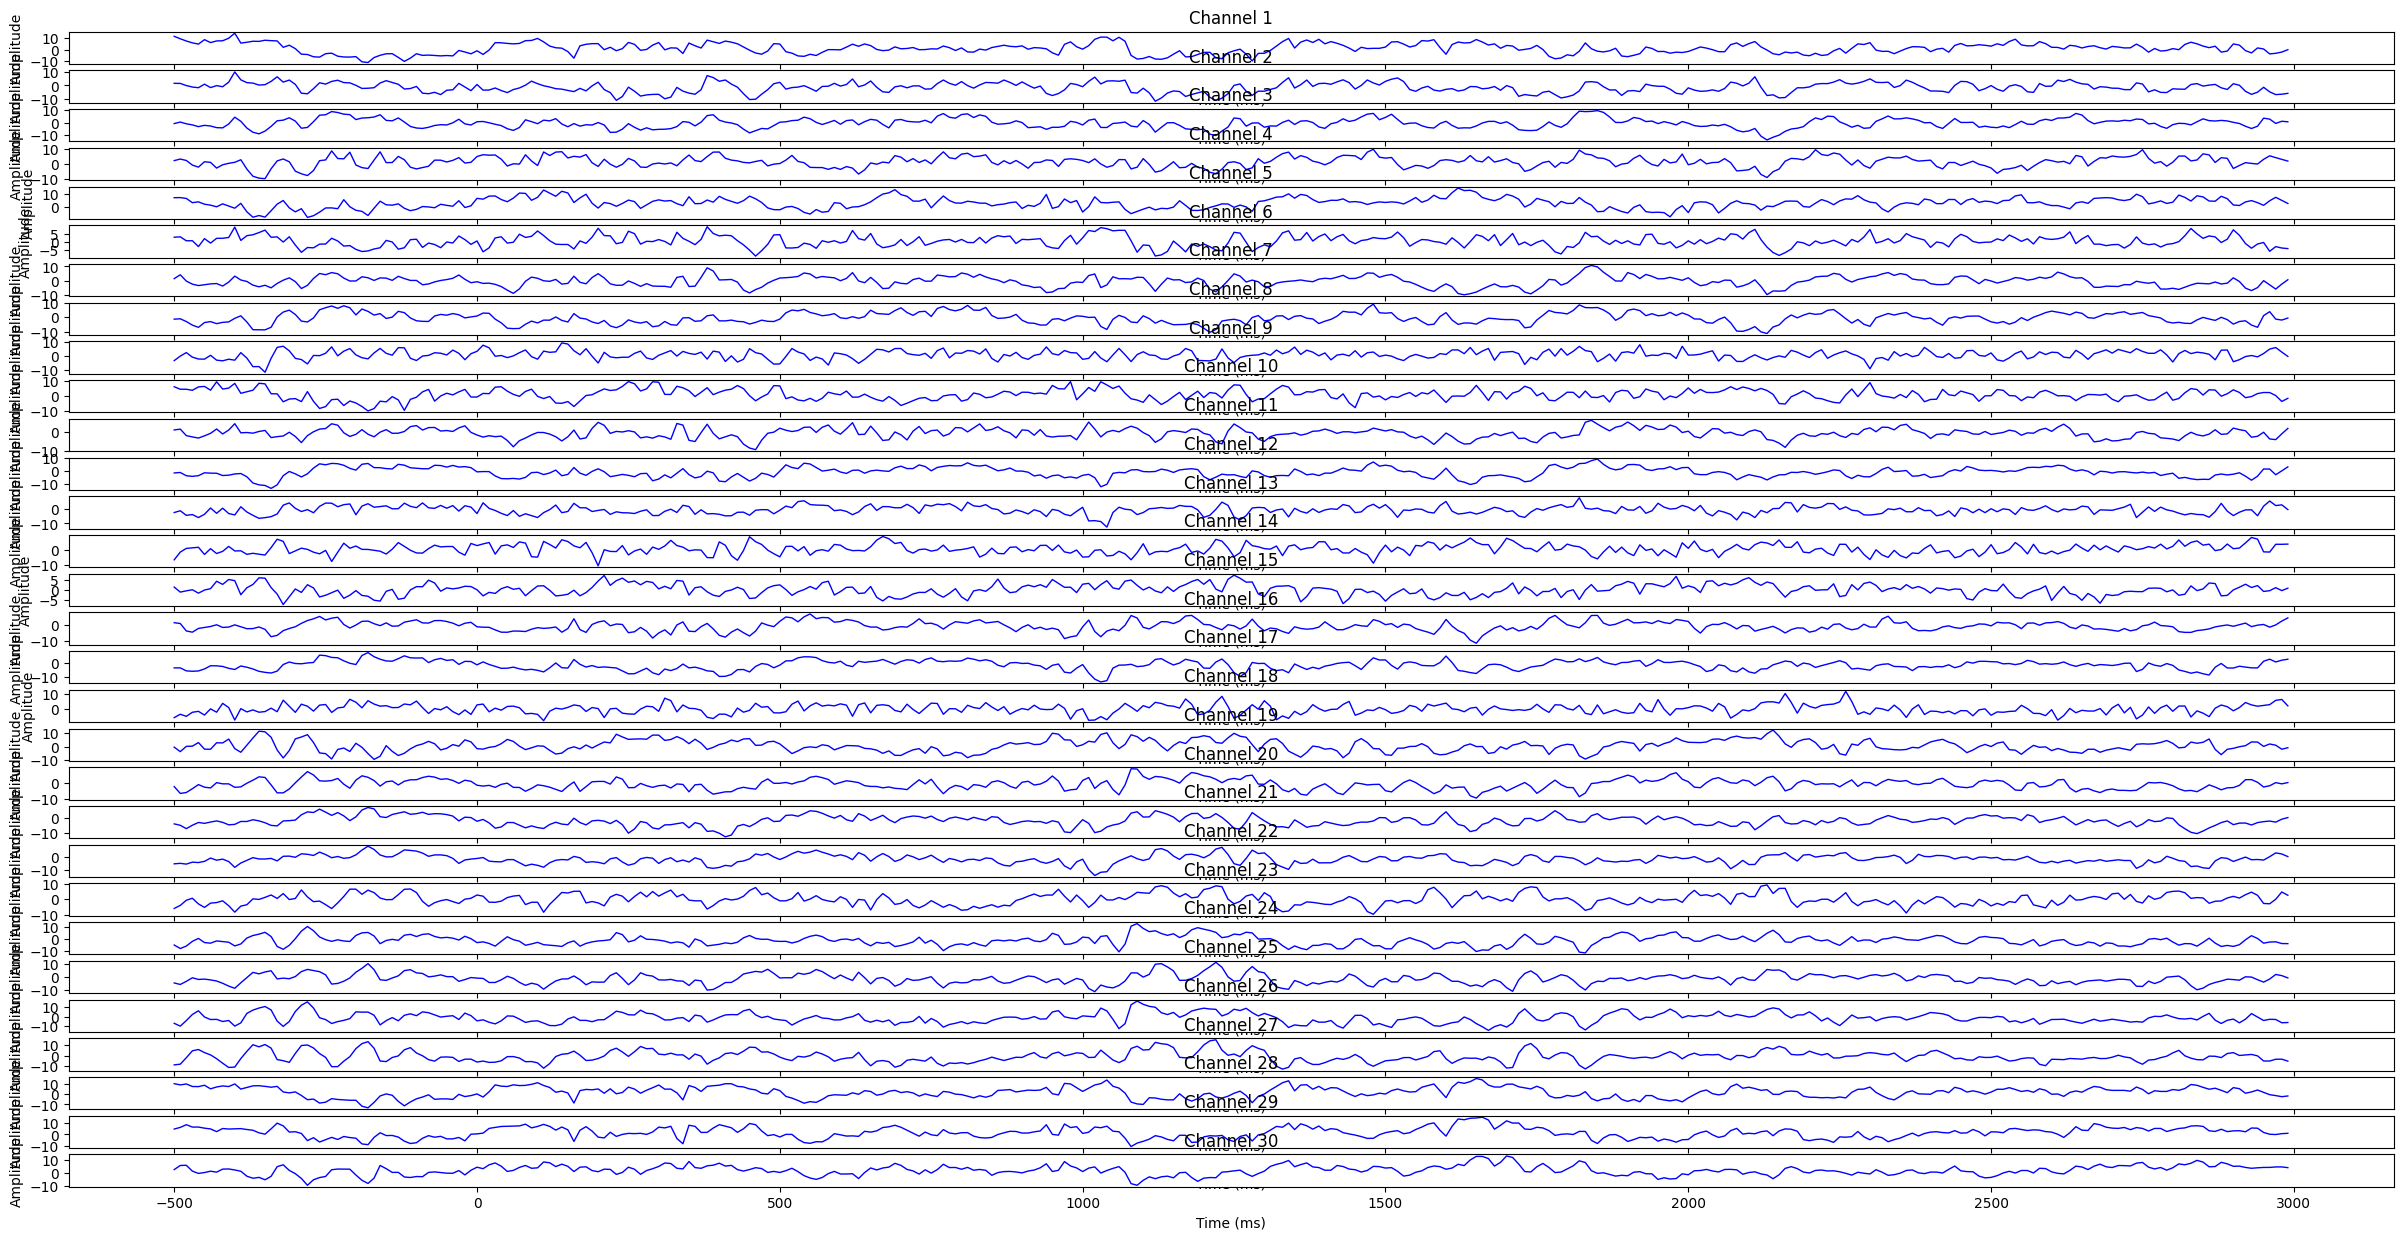

In [25]:
eeg_channel(observer_df)

<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


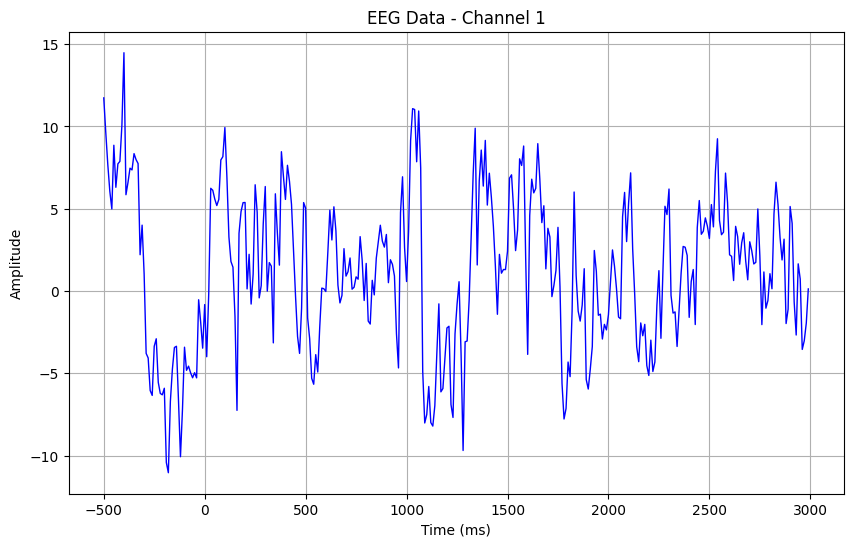

In [26]:
eeg_channel(observer_df,1)


<ipython-input-21-c50d62728d91>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eeg_data = eeg_df.iloc[0][0]
<ipython-input-21-c50d62728d91>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  timestamps = eeg_df.iloc[0][1]


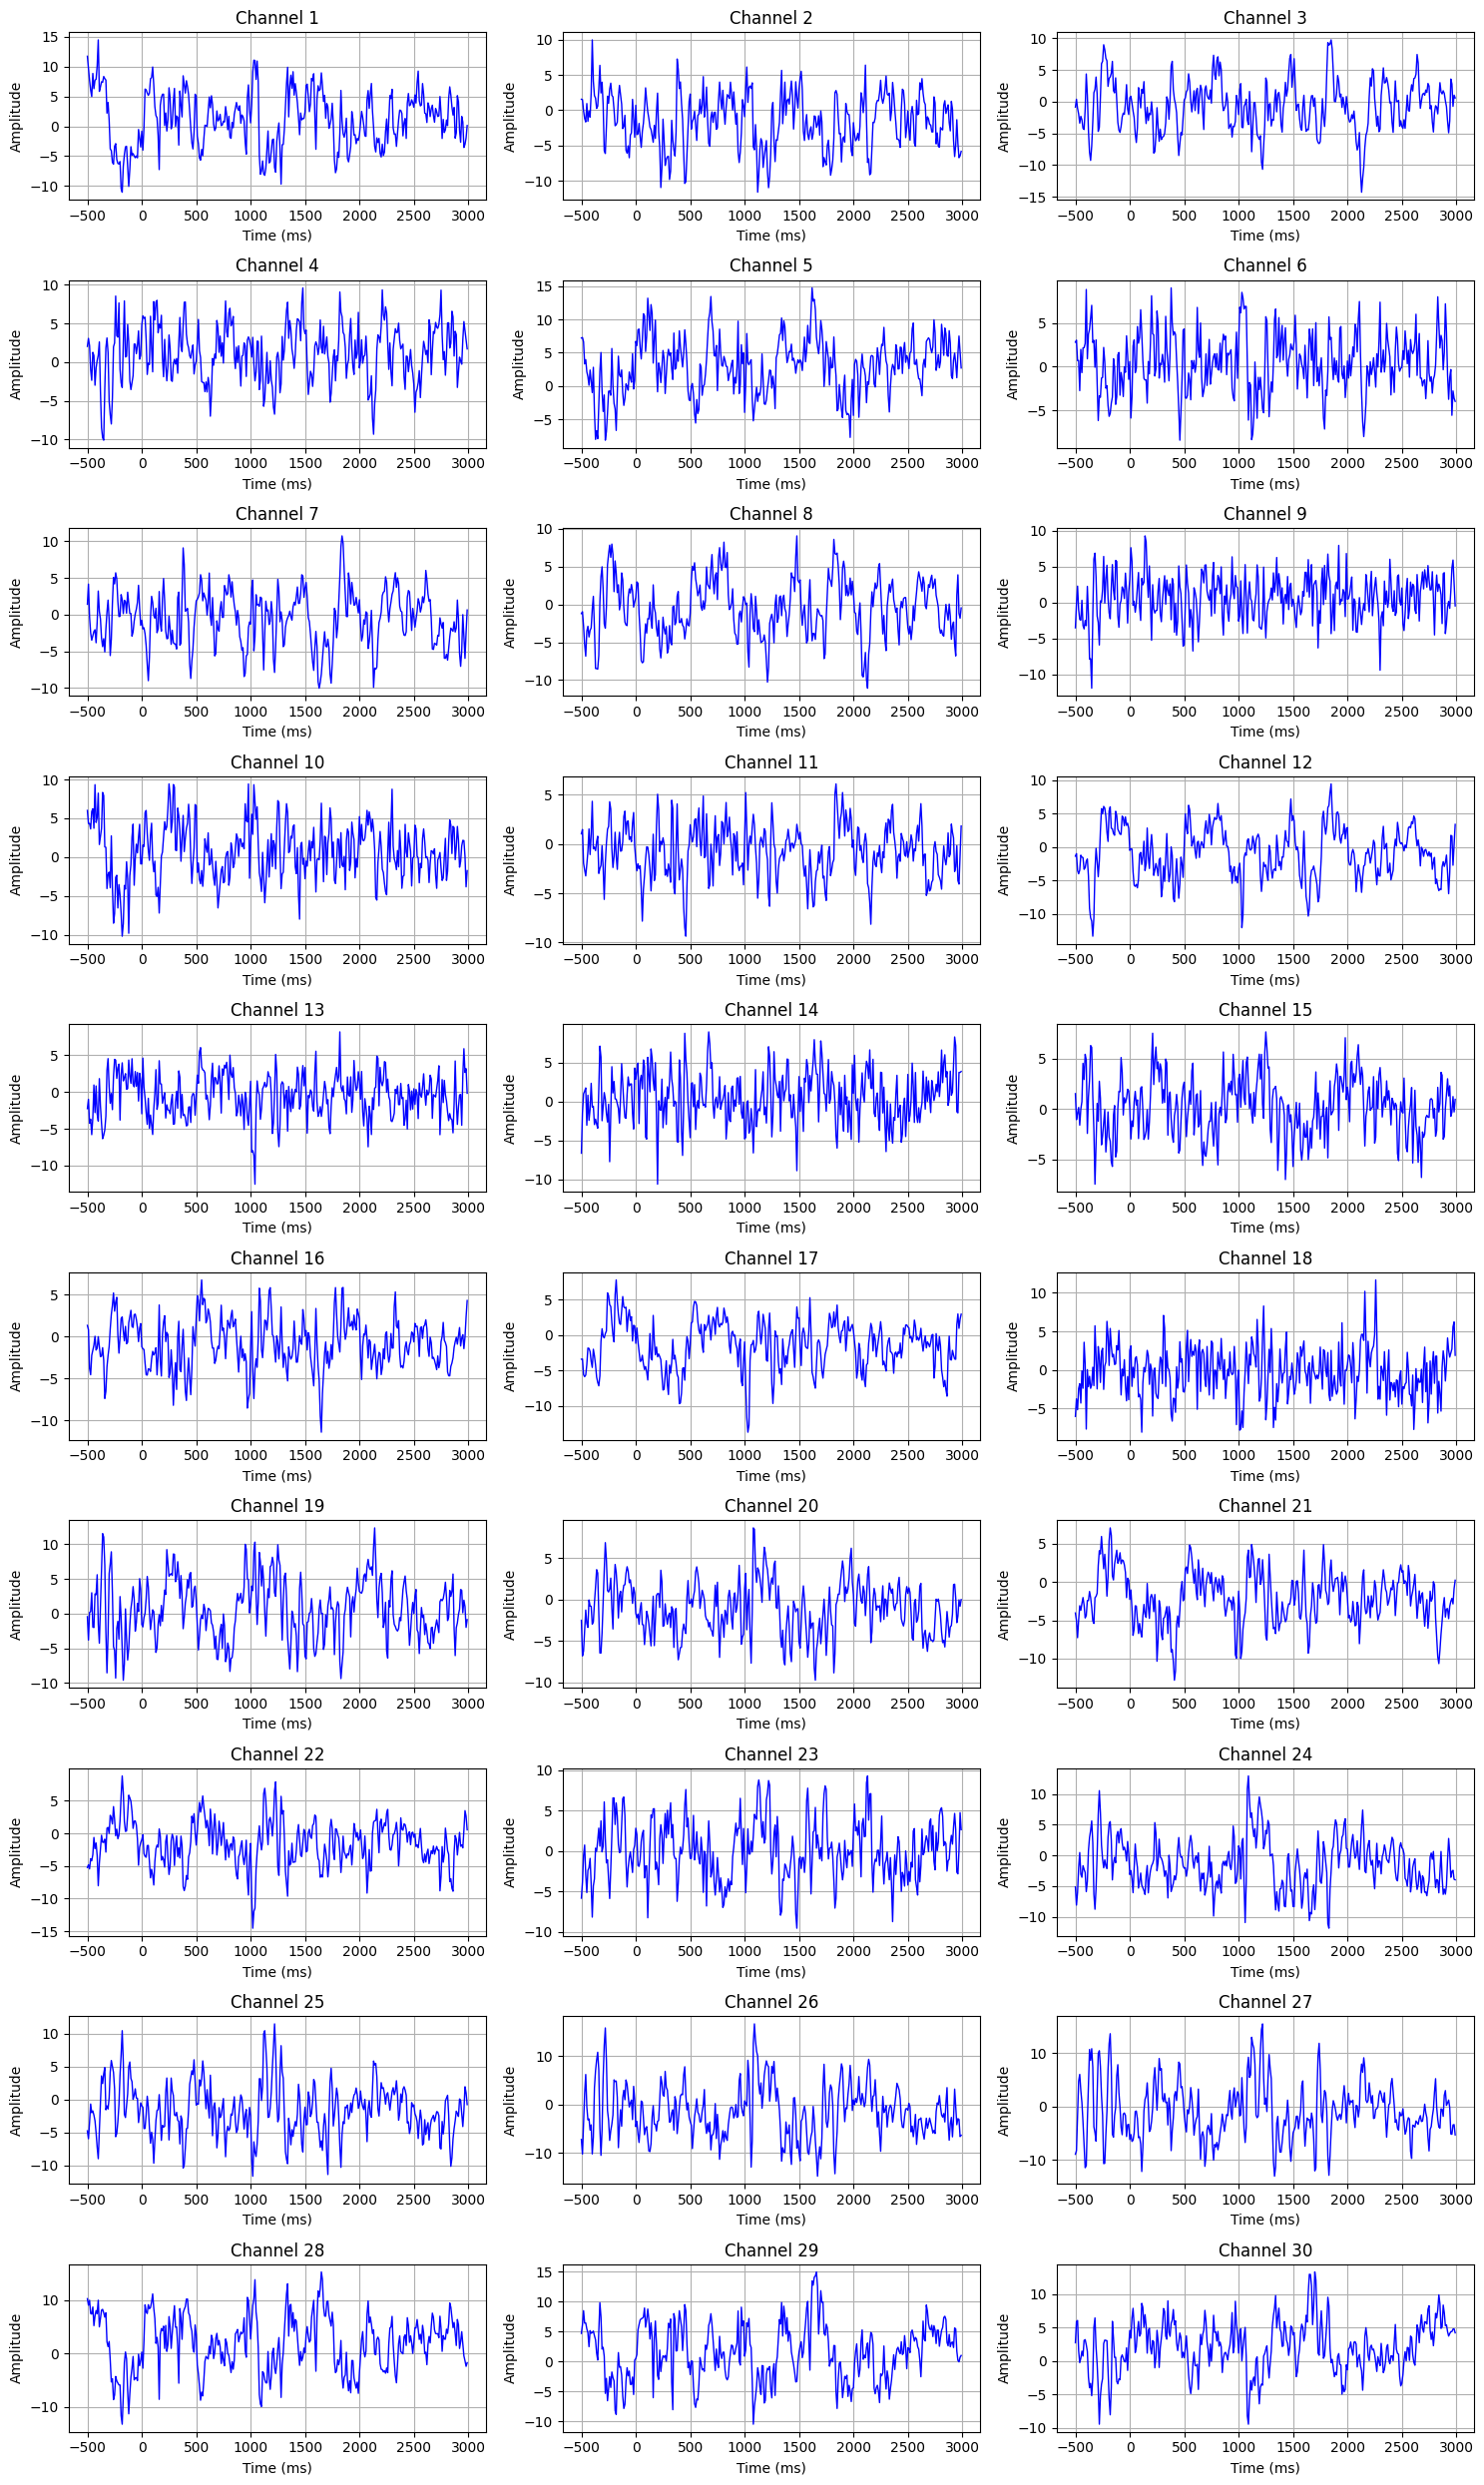

In [27]:
eeg_channel(observer_df, subplots=1)


# Trial

In [ ]:
timestamp_log_upd.head(15)

0                1              2  \
0   2018-08-30  14:56:39.321000  25.2757729933   
1   2018-08-30  14:56:41.310000  27.2635283424   
2   2018-08-30  14:56:41.664000  27.6184087797   
3   2018-08-30  14:56:41.673000  27.6273959005   
4   2018-08-30  14:56:52.459000  38.4134304448   
5   2018-08-30  14:57:16.444000  62.3984773095   
6   2018-08-30  14:57:18.460000  64.4153835775   
7   2018-08-30  14:57:20.461000  66.4156100626   
8   2018-08-30  14:57:23.478000  69.4322299113   
9   2018-08-30  14:57:25.528000  71.4833453654   
10  2018-08-30  14:57:25.761000  71.7161307674   
11  2018-08-30  14:57:26.645000  72.5996550921   
12  2018-08-30  14:57:26.679000  72.6335549695   
13  2018-08-30  14:57:27.710000  73.6658257806   
14  2018-08-30  14:57:28.841000  74.7956469086   

                                  3  
0                    init_cedruspad  
1                  experiment_start  
2                           welcome  
3                      assignDevice  
4                       colorScheme  
5                             round  
6                             cross  
7                             cardL  
8                player_input_start  
9                 playerinput_Lie_4  
10             observer_input_start  
11                      obsInp_True  
12  result_trial_observer_incorrect  
13        result_trial_point_status  
14                            cross

In [ ]:
t=timestamp_log_upd.iloc[:,1]
t

0       14:56:39.321000
1       14:56:41.310000
2       14:56:41.664000
3       14:56:41.673000
4       14:56:52.459000
             ...       
3946    16:11:52.178000
3947    16:11:53.221000
3948    16:11:54.337000
3949    16:11:55.379000
3950    16:11:59.498000
Name: 1, Length: 3951, dtype: object

In [ ]:
t=timestamp_log_upd.iloc[:,1]
# Convert the timestamp column to datetime
df= pd.to_datetime(t,format='%H:%M:%S.%f').dt.time

# To perform calculations, convert to timedelta from the start of the day
df = pd.to_timedelta(df.astype(str))

# Calculate the time difference between consecutive rows
df_tf = df.diff().dt.total_seconds() * 1000

# Function to calculate time difference between two timedeltas in milliseconds
def time_difference_ms(td1, td2):
    return (td2 - td1).total_seconds() * 1000

# Example usage
td1 = df.loc[0]
td2 = df.loc[1]
difference_ms = time_difference_ms(td1, td2)

print(f"Time difference between {td1} and {td2} in milliseconds: {difference_ms} ms")

df_tf


Time difference between 0 days 14:56:39.321000 and 0 days 14:56:41.310000 in milliseconds: 1988.9999999999998 ms


0           NaN
1        1989.0
2         354.0
3           9.0
4       10786.0
         ...   
3946       19.0
3947     1043.0
3948     1116.0
3949     1042.0
3950     4119.0
Name: 1, Length: 3951, dtype: float64

In [ ]:
n=timestamp_log_upd.iloc[:,2]
# Convert the 'time' column to numeric
m = pd.to_numeric(n)

# Calculate the time difference between consecutive rows
df['time_diff'] = m.diff()
m.diff()

0             NaN
1        1.987755
2        0.354880
3        0.008987
4       10.786035
          ...    
3946     0.018500
3947     1.043575
3948     1.115619
3949     1.042070
3950     4.118966
Name: 2, Length: 3951, dtype: float64

In [ ]:
updated_df_tf=pd.concat([df_tf,timestamp_log_upd.iloc[:,3]], axis=1)
updated_df_tf.head(47)

1                                3
0       NaN                   init_cedruspad
1    1989.0                 experiment_start
2     354.0                          welcome
3       9.0                     assignDevice
4   10786.0                      colorScheme
5   23985.0                            round
6    2016.0                            cross
7    2001.0                            cardL
8    3017.0               player_input_start
9    2050.0                playerinput_Lie_4
10    233.0             observer_input_start
11    884.0                      obsInp_True
12     34.0  result_trial_observer_incorrect
13   1031.0        result_trial_point_status
14   1131.0                            cross
15   2020.0                            cardT
16   3021.0               player_input_start
17   1347.0               playerinput_True_4
18    233.0             observer_input_start
19    467.0                       obsInp_Lie
20     24.0  result_trial_observer_incorrect
21   1039.0        result_trial_point_status
22   1122.0                            cross
23   2014.0                            cardS
24   3003.0               player_input_start
25    932.0                playerinput_Lie_2
26    233.0             observer_input_start
27    483.0                       obsInp_Lie
28     30.0    result_trial_observer_correct
29   1035.0        result_trial_point_status
30   1128.0                            cross
31   2023.0                            cardS
32   3000.0               player_input_start
33    868.0               playerinput_True_4
34    233.0             observer_input_start
35   1150.0                       obsInp_Lie
36     30.0  result_trial_observer_incorrect
37   1034.0        result_trial_point_status
38   1123.0                            cross
39   2030.0                            cardS
40   3016.0               player_input_start
41    968.0               playerinput_True_4
42    233.0             observer_input_start
43    384.0                      obsInp_True
44     23.0    result_trial_observer_correct
45   1039.0        result_trial_point_status
46   1138.0                            cross

In [ ]:
def filter(df, column, categorylist):
  filterdf=df[df[column].isin(categorylist)]
  return filterdf

#updated_df_tf_filtered=updated_df_tf[updated_df_tf['3'].isin(['round','result_trial_point_status'])]
updated_df_tf_filtered=filter(updated_df_tf,'3',['cardT', 'cardL','cardS'])
updated_df_tf_filtered.head(46)

1      3
7    2001.0  cardL
15   2020.0  cardT
23   2014.0  cardS
31   2023.0  cardS
39   2030.0  cardS
47   2016.0  cardT
55   2010.0  cardT
63   2013.0  cardS
71   2024.0  cardL
79   2017.0  cardS
87   2025.0  cardT
95   2012.0  cardT
103  2019.0  cardS
111  2019.0  cardT
119  2013.0  cardT
127  2009.0  cardS
135  2009.0  cardS
143  2020.0  cardT
151  2025.0  cardS
159  2021.0  cardS
167  2023.0  cardS
175  2019.0  cardS
183  2031.0  cardS
191  2017.0  cardL
196  2000.0  cardL
201  2001.0  cardL
209  2011.0  cardS
217  2023.0  cardL
225  2019.0  cardS
233  2018.0  cardS
241  2008.0  cardL
246  2000.0  cardL
254  2018.0  cardS
262  2011.0  cardL
270  2028.0  cardT
278  2013.0  cardT
286  2024.0  cardS
294  2043.0  cardS
302  2012.0  cardS
310  2011.0  cardL
318  2018.0  cardL
326  2018.0  cardL
334  2024.0  cardL
342  2019.0  cardL
350  2034.0  cardS
358  2019.0  cardT

In [ ]:
updated_df_tf['3'].unique()

array(['init_cedruspad', 'experiment_start', 'welcome', 'assignDevice',
       'colorScheme', 'round', 'cross', 'cardL', 'player_input_start',
       'playerinput_Lie_4', 'observer_input_start', 'obsInp_True',
       'result_trial_observer_incorrect', 'result_trial_point_status',
       'cardT', 'playerinput_True_4', 'obsInp_Lie', 'cardS',
       'playerinput_Lie_2', 'result_trial_observer_correct',
       'playerinput_True_1', 'playerinput_Lie_3', 'playerinput_True_5',
       'playerinput_True_6', 'playerinput_True_2', 'playerinput_Lie_5',
       'error_player_input_wrong', 'error_screen', 'playerinput_True_3',
       'playerinput_Lie_6', 'playerinput_Lie_1',
       'result_round_observer_win', 'breakStart', 'breakEnd',
       'error_player_input_timeout', 'result_round_observer_lose',
       'result_final_observer_win', 'experiment_end'], dtype=object)

In [ ]:
df['Category']=updated_df_tf['3']
unique_values_counts_df = df['Category'].value_counts().reset_index()
unique_values_counts_df.columns = ['Category', 'Count']
unique_values_counts_df

Category  Count
0                player_input_start    490
1                             cross    490
2              observer_input_start    484
3         result_trial_point_status    484
4   result_trial_observer_incorrect    259
5                       obsInp_True    255
6                             cardS    242
7                        obsInp_Lie    229
8     result_trial_observer_correct    225
9                             cardL    125
10                            cardT    123
11                playerinput_Lie_2     55
12               playerinput_True_6     51
13                playerinput_Lie_3     50
14               playerinput_True_4     45
15                playerinput_Lie_5     44
16                playerinput_Lie_1     42
17                playerinput_Lie_4     37
18                playerinput_Lie_6     36
19               playerinput_True_1     35
20               playerinput_True_5     33
21               playerinput_True_2     28
22               playerinput_True_3     28
23                            round     11
24                         breakEnd     10
25                       breakStart     10
26        result_round_observer_win      9
27                     error_screen      6
28         error_player_input_wrong      5
29       result_round_observer_lose      2
30                      colorScheme      1
31                     assignDevice      1
32                          welcome      1
33                 experiment_start      1
34                   init_cedruspad      1
35       error_player_input_timeout      1
36        result_final_observer_win      1
37                   experiment_end      1

In [ ]:
#filtering true
true_df=filter(updated_df_tf,'3',['playerinput_True_1', 'playerinput_True_2', 'playerinput_True_3', 'playerinput_True_4', 'playerinput_True_5', 'playerinput_True_6'])
true_df['3'].value_counts()

3
playerinput_True_6    51
playerinput_True_4    45
playerinput_True_1    35
playerinput_True_5    33
playerinput_True_2    28
playerinput_True_3    28
Name: count, dtype: int64

In [ ]:
true_df

1                   3
17    1347.0  playerinput_True_4
33     868.0  playerinput_True_4
41     968.0  playerinput_True_4
49    1631.0  playerinput_True_1
57    1081.0  playerinput_True_4
...      ...                 ...
3863   750.0  playerinput_True_6
3871   938.0  playerinput_True_4
3927   646.0  playerinput_True_3
3935   734.0  playerinput_True_3
3943   867.0  playerinput_True_6

[220 rows x 2 columns]

In [ ]:
#filtering false
lie_df=filter(updated_df_tf,'3',['playerinput_Lie_1', 'playerinput_Lie_2', 'playerinput_Lie_3', 'playerinput_Lie_4', 'playerinput_Lie_5', 'playerinput_Lie_6'])
lie_df['3'].value_counts()

3
playerinput_Lie_2    55
playerinput_Lie_3    50
playerinput_Lie_5    44
playerinput_Lie_1    42
playerinput_Lie_4    37
playerinput_Lie_6    36
Name: count, dtype: int64

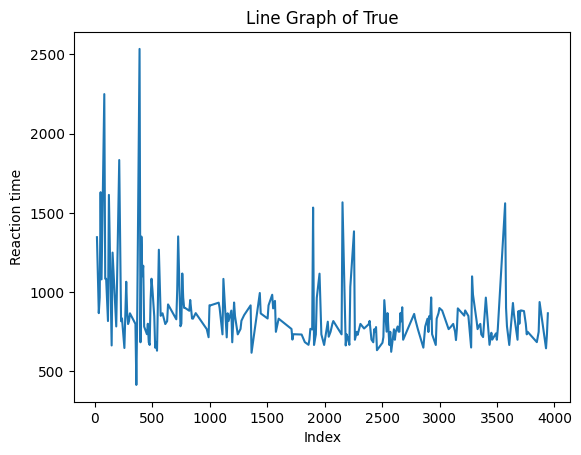

In [ ]:
data=true_df.iloc[:,0]

# Create a line graph
data.plot(kind='line')
plt.title('Line Graph of True')
plt.xlabel('Index')
plt.ylabel('Reaction time')
plt.show()

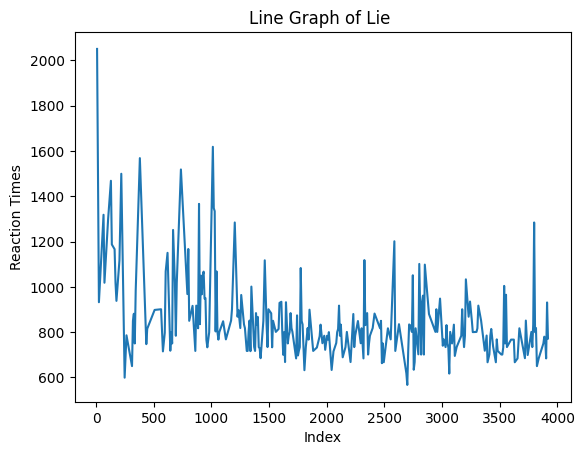

In [ ]:
data=lie_df.iloc[:,0]

# Create a line graph
data.plot(kind='line')
plt.title('Line Graph of Lie ')
plt.xlabel('Index')
plt.ylabel('Reaction Times')
plt.show()

In [ ]:
true_df[1].describe()

count     220.000000
mean      862.813636
std       242.586833
min       415.000000
25%       734.000000
50%       807.500000
75%       900.250000
max      2535.000000
Name: 1, dtype: float64

In [ ]:
lie_df[1].describe()

count     264.000000
mean      851.181818
std       188.351073
min       567.000000
25%       734.000000
50%       801.000000
75%       898.250000
max      2050.000000
Name: 1, dtype: float64

In [ ]:
n=filter(updated_df_tf,'3',['cardT','cardL','cardS','playerinput_True_1', 'playerinput_True_2', 'playerinput_True_3', 'playerinput_True_4', 'playerinput_True_5', 'playerinput_True_6','playerinput_Lie_1', 'playerinput_Lie_2', 'playerinput_Lie_3', 'playerinput_Lie_4', 'playerinput_Lie_5', 'playerinput_Lie_6' ])
n

1                   3
7     2001.0               cardL
9     2050.0   playerinput_Lie_4
15    2020.0               cardT
17    1347.0  playerinput_True_4
23    2014.0               cardS
...      ...                 ...
3927   646.0  playerinput_True_3
3933  2014.0               cardT
3935   734.0  playerinput_True_3
3941  2015.0               cardS
3943   867.0  playerinput_True_6

[974 rows x 2 columns]

In [ ]:


card=['cardT', 'cardL', 'cardS']
df=n
# Process the DataFrame to associate each player input with its preceding type
processed_data = []
current_type = None

for _, row in df.iterrows():
    if row['3'] in card:
        current_type = row['3']
        processed_data.append((row[1], current_type, None))
    else:
        processed_data.append((row[1], current_type, row['3']))

# Convert to DataFrame
processed_df = pd.DataFrame(processed_data, columns=['Time (ms)', 'Type', 'Player Input'])

# Display the processed DataFrame
print("Processed DataFrame:")
print(processed_df)


Processed DataFrame:
     Time (ms)   Type        Player Input
0       2001.0  cardL                None
1       2050.0  cardL   playerinput_Lie_4
2       2020.0  cardT                None
3       1347.0  cardT  playerinput_True_4
4       2014.0  cardS                None
..         ...    ...                 ...
969      646.0  cardS  playerinput_True_3
970     2014.0  cardT                None
971      734.0  cardT  playerinput_True_3
972     2015.0  cardS                None
973      867.0  cardS  playerinput_True_6

[974 rows x 3 columns]


In [ ]:
# Function to filter rows by type
def filter_by_type(df, player_type):
    return df[df['Type'] == player_type]

# Filter rows for type 'cardS'
filtered_cardS = filter_by_type(processed_df, 'cardS')
filtered_cardT = filter_by_type(processed_df, 'cardT')
filtered_cardL = filter_by_type(processed_df, 'cardL')

In [ ]:
filtered_cardS = filter_by_type(processed_df, 'cardS')
filtered_cardS

Time (ms)   Type        Player Input
4       2014.0  cardS                None
5        932.0  cardS   playerinput_Lie_2
6       2023.0  cardS                None
7        868.0  cardS  playerinput_True_4
8       2030.0  cardS                None
..         ...    ...                 ...
957      750.0  cardS   playerinput_Lie_6
968     2011.0  cardS                None
969      646.0  cardS  playerinput_True_3
972     2015.0  cardS                None
973      867.0  cardS  playerinput_True_6

[484 rows x 3 columns]

In [ ]:
df=filtered_cardS
# Assuming df is your DataFrame
def filter_by_player_input(df, player_input):
    # Filter for player input containing 'playerinput_True_' or 'playerinput_Lie_'
    filtered_df = df[df['Player Input'].str.contains(f'playerinput_{player_input}_', na=False)]
    return filtered_df

# Filter for 'playerinput_True_'
filtered_Strue = filter_by_player_input(df, 'True')
print("Filtered DataFrame for playerinput_True_:")
print(filtered_Strue)

# Filter for 'playerinput_Lie_'
filtered_Slie = filter_by_player_input(df, 'Lie')
print("\nFiltered DataFrame for playerinput_Lie_:")
print(filtered_Slie)

Filtered DataFrame for playerinput_True_:
     Time (ms)   Type        Player Input
7        868.0  cardS  playerinput_True_4
9        968.0  cardS  playerinput_True_4
19      2250.0  cardS  playerinput_True_5
37      1250.0  cardS  playerinput_True_5
45       784.0  cardS  playerinput_True_5
..         ...    ...                 ...
929      750.0  cardS  playerinput_True_6
953      750.0  cardS  playerinput_True_6
955      938.0  cardS  playerinput_True_4
969      646.0  cardS  playerinput_True_3
973      867.0  cardS  playerinput_True_6

[99 rows x 3 columns]

Filtered DataFrame for playerinput_Lie_:
     Time (ms)   Type       Player Input
5        932.0  cardS  playerinput_Lie_2
15      1318.0  cardS  playerinput_Lie_3
25      1301.0  cardS  playerinput_Lie_4
31      1468.0  cardS  playerinput_Lie_5
33      1187.0  cardS  playerinput_Lie_5
..         ...    ...                ...
935      834.0  cardS  playerinput_Lie_1
939      800.0  cardS  playerinput_Lie_4
941      818.0  card

In [ ]:
filtered_cardT = filter_by_type(processed_df, 'cardT')
filtered_cardT

Time (ms)   Type        Player Input
2       2020.0  cardT                None
3       1347.0  cardT  playerinput_True_4
10      2016.0  cardT                None
11      1631.0  cardT  playerinput_True_1
12      2010.0  cardT                None
..         ...    ...                 ...
949      685.0  cardT  playerinput_True_3
950     2026.0  cardT                None
951      719.0  cardT  playerinput_True_2
970     2014.0  cardT                None
971      734.0  cardT  playerinput_True_3

[244 rows x 3 columns]

In [ ]:
df=filtered_cardT
# Assuming df is your DataFrame
def filter_by_player_input(df, player_input):
    # Filter for player input containing 'playerinput_True_' or 'playerinput_Lie_'
    filtered_df = df[df['Player Input'].str.contains(f'playerinput_{player_input}_', na=False)]
    return filtered_df

# Filter for 'playerinput_True_'
filtered_Itrue = filter_by_player_input(df, 'True')
print("Filtered DataFrame for playerinput_True_:")
print(filtered_Itrue)

Filtered DataFrame for playerinput_True_:
     Time (ms)   Type        Player Input
3       1347.0  cardT  playerinput_True_4
11      1631.0  cardT  playerinput_True_1
13      1081.0  cardT  playerinput_True_4
21      1085.0  cardT  playerinput_True_6
23      1085.0  cardT  playerinput_True_4
..         ...    ...                 ...
915      885.0  cardT  playerinput_True_4
921      881.0  cardT  playerinput_True_6
949      685.0  cardT  playerinput_True_3
951      719.0  cardT  playerinput_True_2
971      734.0  cardT  playerinput_True_3

[121 rows x 3 columns]


In [ ]:
filtered_cardL = filter_by_type(processed_df, 'cardL')
filtered_cardL

Time (ms)   Type       Player Input
0       2001.0  cardL               None
1       2050.0  cardL  playerinput_Lie_4
16      2024.0  cardL               None
17      1018.0  cardL  playerinput_Lie_3
46      2017.0  cardL               None
..         ...    ...                ...
963      684.0  cardL  playerinput_Lie_3
964     2006.0  cardL               None
965      931.0  cardL  playerinput_Lie_4
966     2016.0  cardL               None
967      772.0  cardL  playerinput_Lie_4

[246 rows x 3 columns]

In [ ]:
df=filtered_cardL
# Assuming df is your DataFrame
def filter_by_player_input(df, player_input):
    # Filter for player input containing 'playerinput_True_' or 'playerinput_Lie_'
    filtered_df = df[df['Player Input'].str.contains(f'playerinput_{player_input}_', na=False)]
    return filtered_df

# Filter for 'playerinput_True_'
filtered_Ilie = filter_by_player_input(df, 'Lie')
print("Filtered DataFrame for playerinput_Lie_:")
print(filtered_Ilie)

Filtered DataFrame for playerinput_Lie_:
     Time (ms)   Type       Player Input
1       2050.0  cardL  playerinput_Lie_4
17      1018.0  cardL  playerinput_Lie_3
49      1117.0  cardL  playerinput_Lie_2
53      1499.0  cardL  playerinput_Lie_5
60       599.0  cardL  playerinput_Lie_6
..         ...    ...                ...
959      780.0  cardL  playerinput_Lie_4
961      767.0  cardL  playerinput_Lie_6
963      684.0  cardL  playerinput_Lie_3
965      931.0  cardL  playerinput_Lie_4
967      772.0  cardL  playerinput_Lie_4

[121 rows x 3 columns]


In [ ]:
filtered_Strue['Time (ms)']

7       868.0
9       968.0
19     2250.0
37     1250.0
45      784.0
        ...  
929     750.0
953     750.0
955     938.0
969     646.0
973     867.0
Name: Time (ms), Length: 99, dtype: float64

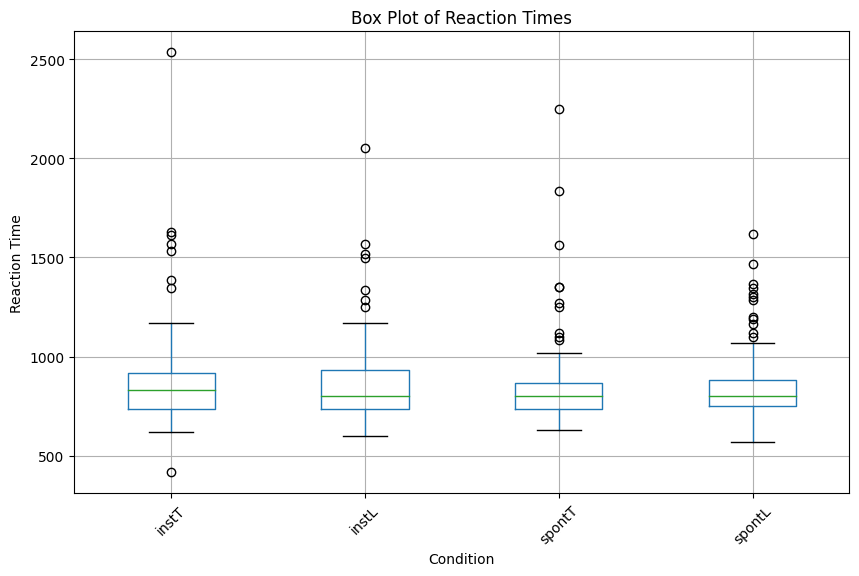

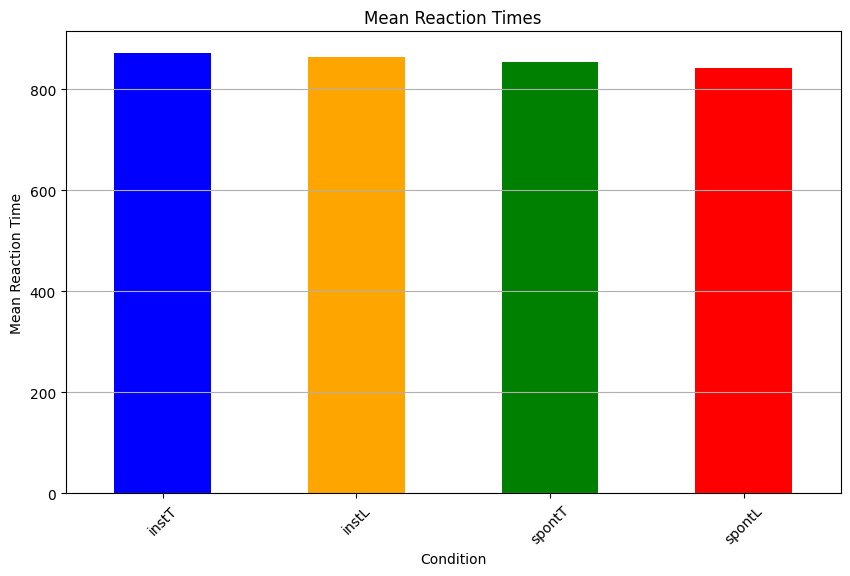

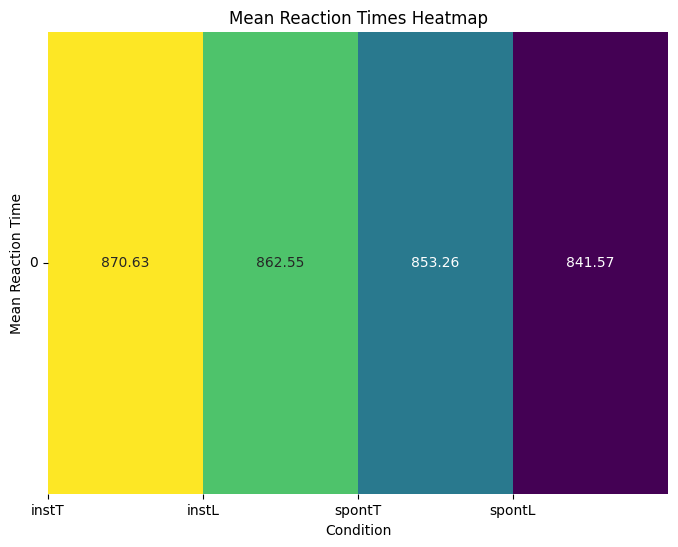

In [ ]:
#box plot
data = {
    'instT': filtered_Itrue['Time (ms)'],
    'instL': filtered_Ilie['Time (ms)'],
    'spontT': filtered_Strue['Time (ms)'],
    'spontL': filtered_Slie['Time (ms)']
}
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of Reaction Times')
plt.ylabel('Reaction Time')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
df.mean().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Reaction Times')
plt.ylabel('Mean Reaction Time')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#heatmap
# Calculate the mean reaction times for each condition
mean_reaction_times = df.mean()

# Reshape the data for the heatmap
heatmap_data = mean_reaction_times.values.reshape(1, -1)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar=False)
plt.title('Mean Reaction Times Heatmap')
plt.xlabel('Condition')
plt.ylabel('Mean Reaction Time')
plt.xticks(ticks=range(len(mean_reaction_times)), labels=mean_reaction_times.index)
plt.yticks(rotation=0)
plt.show()

# Reaction Time Analysis

In [ ]:
#timestamp analysis


def timestampcardfilter(timestamp_log_upd):
    t=timestamp_log_upd.iloc[:,1]
    # Convert the timestamp column to datetime
    df= pd.to_datetime(t,format='%H:%M:%S.%f').dt.time

    # To perform calculations, convert to timedelta from the start of the day
    df = pd.to_timedelta(df.astype(str))

    # Calculate the time difference between consecutive rows
    df_tf = df.diff().dt.total_seconds() * 1000

    updated_df_tf=pd.concat([df_tf,timestamp_log_upd.iloc[:,3]], axis=1)

    def filter(df, column, categorylist):
      filterdf=df[df[column].isin(categorylist)]
      return filterdf

    #updated_df_tf_filtered=updated_df_tf[updated_df_tf['3'].isin(['round','result_trial_point_status'])]
    updated_df_tf_filtered=filter(updated_df_tf,'3',['cardT', 'cardL','cardS'])
    #updated_df_tf_filtered.head(46)

    #filtering true
    true_df=filter(updated_df_tf,'3',['playerinput_True_1', 'playerinput_True_2', 'playerinput_True_3', 'playerinput_True_4', 'playerinput_True_5', 'playerinput_True_6'])
    #true_df['3'].value_counts()

    #filtering false
    lie_df=filter(updated_df_tf,'3',['playerinput_Lie_1', 'playerinput_Lie_2', 'playerinput_Lie_3', 'playerinput_Lie_4', 'playerinput_Lie_5', 'playerinput_Lie_6'])
    #lie_df['3'].value_counts()

    n=filter(updated_df_tf,'3',['cardT','cardL','cardS','playerinput_True_1', 'playerinput_True_2', 'playerinput_True_3', 'playerinput_True_4', 'playerinput_True_5', 'playerinput_True_6','playerinput_Lie_1', 'playerinput_Lie_2', 'playerinput_Lie_3', 'playerinput_Lie_4', 'playerinput_Lie_5', 'playerinput_Lie_6' ])
    #n

    card=['cardT', 'cardL', 'cardS']
    df=n
    # Process the DataFrame to associate each player input with its preceding type
    processed_data = []
    current_type = None

    for _, row in df.iterrows():
        if row['3'] in card:
            current_type = row['3']
            processed_data.append((row[1], current_type, None))
        else:
            processed_data.append((row[1], current_type, row['3']))

    # Convert to DataFrame
    processed_df = pd.DataFrame(processed_data, columns=['Time (ms)', 'Type', 'Player Input'])

    # Display the processed DataFrame
    #print("Processed DataFrame:")
    #print(processed_df)

    # Function to filter rows by type
    def filter_by_type(df, player_type):
        return df[df['Type'] == player_type]

    # Filter rows for type 'cardS'
    filtered_cardS = filter_by_type(processed_df, 'cardS')
    filtered_cardT = filter_by_type(processed_df, 'cardT')
    filtered_cardL = filter_by_type(processed_df, 'cardL')
    return filtered_cardT, filtered_cardL, filtered_cardS

def filter_by_player_input(df, player_input):
        # Filter for player input containing 'playerinput_True_' or 'playerinput_Lie_'
        filtered_df = df[df['Player Input'].str.contains(f'playerinput_{player_input}_', na=False)]
        return filtered_df




In [ ]:
cardT, cardL, cardS=timestampcardfilter(timestamp_log_upd)
cardStrue=filter_by_player_input(cardS, 'True')
cardSlie=filter_by_player_input(cardS, 'Lie')

Itrue = filter_by_player_input(cardT, 'True').iloc[:,0]
Ilie = filter_by_player_input(cardL, 'Lie').iloc[:,0]
Strue=cardStrue['Time (ms)']
Slie=cardSlie['Time (ms)']

In [ ]:

import os
import re

def timestampfiles(n):

    def get_filtered_files(folder_path):
        # Regular expression pattern to match the required file format
        pattern = re.compile(r'Player_(sub\d+)_Observer_(sub\d+)_Timestamp\.txt')

        # Dictionary to store the filtered files
        filtered_files = {}

        # Check if the folder exists
        if not os.path.isdir(folder_path):
            print(f"The folder '{folder_path}' does not exist.")
            return filtered_files

        # Iterate over files in the specified folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.txt'):
                match = pattern.match(filename)
                if match:
                    player_id = match.group(1)
                    p_key = f"p{int(player_id[3:])}"  # Convert subXX to pX
                    if p_key not in filtered_files:
                        filtered_files[p_key] = []
                    # Store the file path in the dictionary
                    filtered_files[p_key].append(os.path.join(folder_path, filename))

        return filtered_files

    def get_key_list(filtered_files):
        # Return the list of keys
        return list(filtered_files.keys())

    def get_specific_files(filtered_files, key):
        # Return the list of files for the specified key
        return filtered_files.get(key, [])

    # Specify the folder containing the .txt files
    folder_path = '/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp'

    # Get the filtered files
    filtered_files = get_filtered_files(folder_path)

    # Get the list of keys
    keys = get_key_list(filtered_files)

    # Print the list of keys
    #print("List of keys:", keys)

    # Get specific files for a key, e.g., p1
    keys = [f'p{i}' for i in range(1, 25) if i != 2]
    key_to_retrieve = keys[n]
    specific_files = get_specific_files(filtered_files, key_to_retrieve)

    # Print the files for the specified key
    #print(f"\nFiles for {key_to_retrieve}:")
    for file in specific_files:
        #print(f"  {file}")
        return  file


In [ ]:
timestampfiles(1)

'/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp/Player_sub03_Observer_sub06_Timestamp.txt'

In [ ]:
def timestampdataformat(timestamptxt):
    try:
        timestamp_log = pd.read_fwf(timestamptxt, sep=" ", header=None)
        # Split the specific column
        split_data = timestamp_log[2].str.split(' ', n=1, expand=True)
        # Rename the split columns
        split_data.columns = ['2', '3']
        # Concatenate the original DataFrame with the split columns
        timestamp_log_n = timestamp_log
        timestamp_log_n.drop(columns=[2], inplace=True)
        timestamp_log_upd = pd.concat([timestamp_log_n, split_data], axis=1)
        return timestamp_log_upd
    except FileNotFoundError:
        print(f"File not found: {timestamptxt}")
        return None

In [ ]:
timestampdataformat(timestampfiles(2))

0                1              2  \
0     2018-09-17  14:54:14.288000  1.67350959171   
1     2018-09-17  14:54:15.762000    3.146717706   
2     2018-09-17  14:54:29.078000  1.60601900723   
3     2018-09-17  14:54:31.212000  3.74077730577   
4     2018-09-17  14:54:31.570000  4.09815273551   
...          ...              ...            ...   
3950  2018-09-17  16:14:52.268000  4824.75470641   
3951  2018-09-17  16:14:53.295000   4825.7817948   
3952  2018-09-17  16:14:55.272000  4827.75940445   
3953  2018-09-17  16:14:56.322000  4828.80930996   
3954  2018-09-17  16:15:00.502000  4832.98827611   

                                    3  
0                      init_cedruspad  
1                    experiment_start  
2                      init_cedruspad  
3                    experiment_start  
4                             welcome  
...                               ...  
3950  result_trial_observer_incorrect  
3951        result_trial_point_status  
3952       result_round_observer_lose  
3953       result_final_observer_lose  
3954                   experiment_end  

[3955 rows x 4 columns]

In [ ]:
def timestampupdated_analysis(num):
    timestamp_log_upd=timestampdataformat(timestampfiles(num))
    cardT, cardL, cardS=timestampcardfilter(timestamp_log_upd)
    cardStrue=filter_by_player_input(cardS, 'True')
    cardSlie=filter_by_player_input(cardS, 'Lie')

    Itrue = filter_by_player_input(cardT, 'True').iloc[:,0]
    Ilie = filter_by_player_input(cardL, 'Lie').iloc[:,0]
    Strue=cardStrue['Time (ms)']
    Slie=cardSlie['Time (ms)']

    return [cardT, cardL, cardS, cardStrue, cardSlie, Itrue, Ilie, Strue, Slie]


In [ ]:
test=timestampupdated_analysis(22)[6]
test

1       1158.0
13       644.0
17       526.0
19       644.0
25       483.0
         ...  
1085    1235.0
1093     684.0
1129     935.0
1131     917.0
1133     983.0
Name: Time (ms), Length: 142, dtype: float64

In [ ]:
def combine_participant_data():
    # Example data for demonstration (replace these with your actual data)
    participant_data = []

    # Assuming you have 23 participants
    for participant_id in range(0, 23):
        # Assuming each participant's pandas Series data can be accessed by timestampupdated_analysis(participant_num)
        # Replace these with your actual function call to retrieve the pandas Series data for each participant
        series_data = [timestampupdated_analysis(participant_id)[series_num] for series_num in range(5,9)]

        # Transpose the Series data
        transposed_series_data = [series.values.tolist() for series in series_data]

        # Append the participant number and transposed Series data for the current participant to the list
        participant_data.append([participant_id] + transposed_series_data)

    # Create a DataFrame from the participant data
    df = pd.DataFrame(participant_data, columns=['Participant'] + [f'Series_{i+1}' for i in range(4)])
    # Create a DataFrame from the participant data
    df = pd.DataFrame(participant_data, columns=['Participant', 'instT', 'instL', 'sponT', 'sponL'])

    return df

# Example usage:
combined_df = combine_participant_data()
#print(combined_df)

In [ ]:
combined_df.iloc[0:2]

Participant                                              instT  \
0            0  [1347.0, 1631.0, 1081.0, 1085.0, 1085.0, 818.0...   
1            1  [427.0, 417.0, 518.0, 259.0, 540.0, 268.0, 359...   

                                               instL  \
0  [2050.0, 1018.0, 1117.0, 1499.0, 599.0, 786.0,...   
1  [1168.0, 642.0, 317.0, 451.0, 318.0, 402.0, 45...   

                                               sponT  \
0  [868.0, 968.0, 2250.0, 1250.0, 784.0, 1834.0, ...   
1  [551.0, 642.0, 451.0, 685.0, 351.0, 468.0, 367...   

                                               sponL  
0  [932.0, 1318.0, 1301.0, 1468.0, 1187.0, 1166.0...  
1  [576.0, 1077.0, 600.0, 2910.0, 585.0, 509.0, 4...

In [ ]:
timestampupdated_analysis(1)[6]

3      1168.0
13      642.0
29      317.0
31      451.0
41      318.0
        ...  
932     476.0
946     317.0
952     402.0
960     301.0
962     734.0
Name: Time (ms), Length: 121, dtype: float64

**HEAT MAP**

In [ ]:
data=combined_df
# Create a new DataFrame to store the mean values
mean_df = pd.DataFrame({'Participant': data['Participant']})

# Calculate the mean of each list for each participant and add to the new DataFrame
for col in data.keys():
    if col != 'Participant':
        mean_df[col] = [sum(lst) / len(lst) for lst in data[col]]

print(mean_df)

    Participant       instT        instL       sponT        sponL
0             0  870.628099   862.545455  853.262626   841.566434
1             1  404.628099   414.553719  373.764706   464.977528
2             2  374.975410   352.561983  335.569343   377.390476
3             3  807.852459   660.456000  789.860000   892.610526
4             4  559.694215   543.925620  572.079646   566.302326
5             5  776.117188   813.353846  989.104478   897.083333
6             6  904.256198   862.528926  979.895425   991.677083
7             7  876.983471   779.229508  827.220339   797.314516
8             8  587.867769   531.877049  516.481752   585.857143
9             9  692.198347   794.619835  746.039216   796.233333
10           10  562.925620   674.851240  618.093960   736.376344
11           11  658.454545   705.322314  692.046512   686.885965
12           12  809.975207   788.561983  857.719424   826.825243
13           13  352.115702   378.793388  327.753247   403.420455
14        

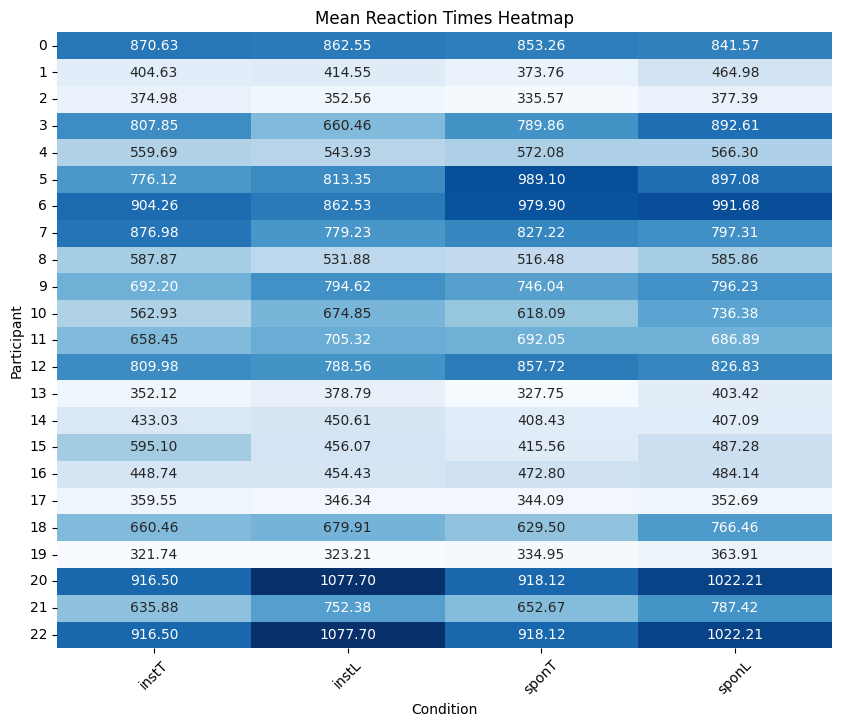

In [ ]:
def create_heatmap(df):
     # Remove 'Participant' column
    df = df.set_index('Participant')

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, cmap='Blues', annot=True, fmt=".2f", cbar=False)
    plt.title('Mean Reaction Times Heatmap')
    plt.xlabel('Condition')
    plt.ylabel('Participant')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
create_heatmap(mean_df)

**BOX PLOT**

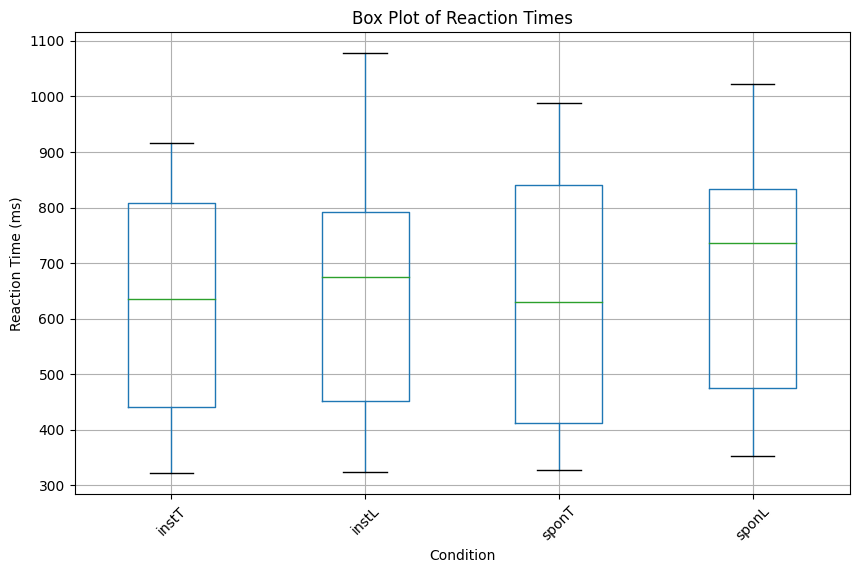

In [ ]:
df=mean_df.iloc[:,1:]

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of Reaction Times')
plt.ylabel('Reaction Time (ms)')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Bar Plot**

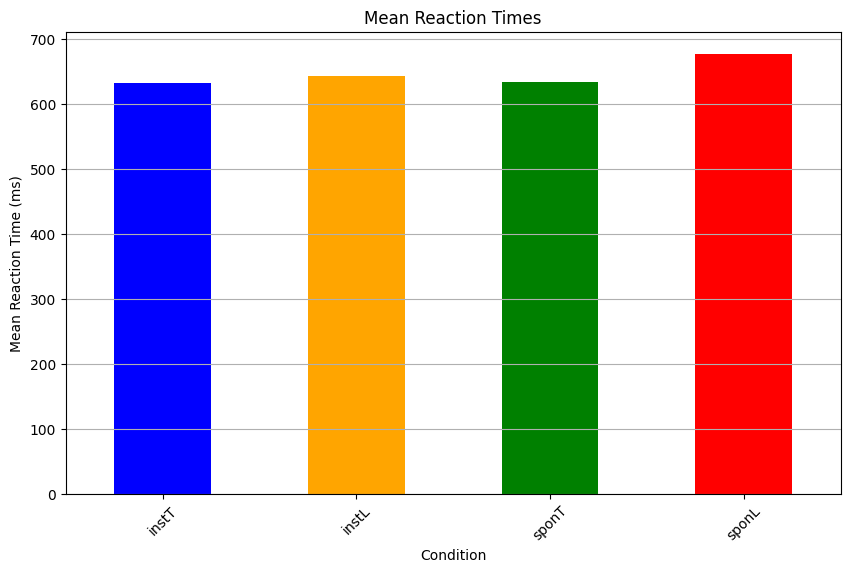

In [ ]:
df=mean_df.iloc[:,1:]
# Plotting the bar plot
plt.figure(figsize=(10, 6))
df.mean().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Reaction Times')
plt.ylabel('Mean Reaction Time (ms)')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

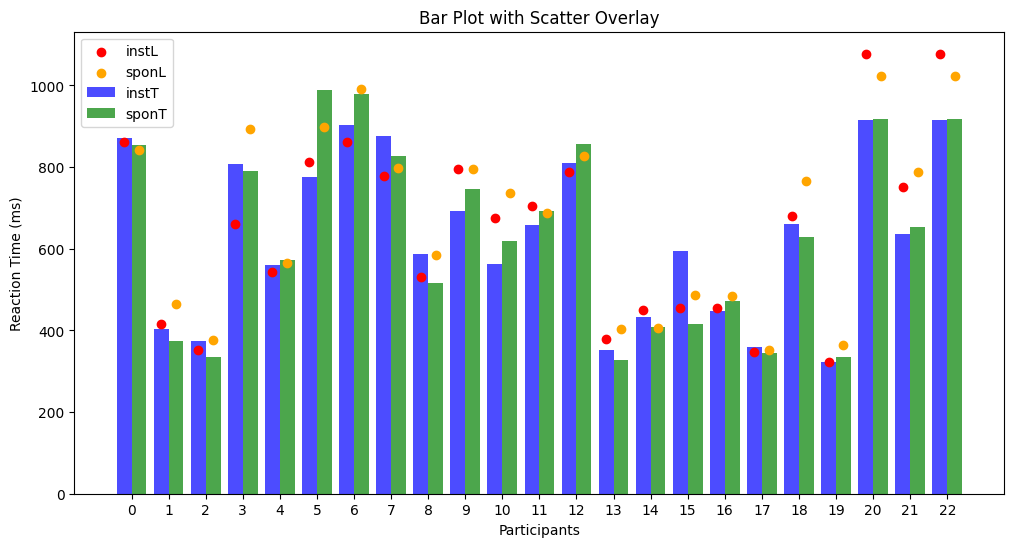

In [ ]:
df=mean_df.iloc[:,1:]
# Set the figure size
plt.figure(figsize=(12, 6))

# Bar plot for instT and sponT
bar_width = 0.4
indices = df.index
bar1 = plt.bar(indices - bar_width/2, df['instT'], width=bar_width, label='instT', color='blue', alpha=0.7)
bar2 = plt.bar(indices + bar_width/2, df['sponT'], width=bar_width, label='sponT', color='green', alpha=0.7)

# Scatter plot for instL and sponL
plt.scatter(indices - bar_width/2, df['instL'], color='red', label='instL', zorder=5)
plt.scatter(indices + bar_width/2, df['sponL'], color='orange', label='sponL', zorder=5)

# Customize the plot
plt.xlabel('Participants')
plt.ylabel('Reaction Time (ms)')
plt.title('Bar Plot with Scatter Overlay')
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()

# ERP ANALYSIS

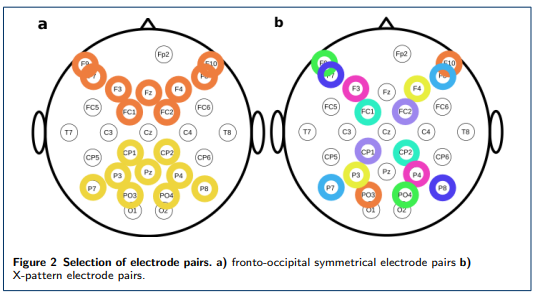

**ERP ANALYSIS FROM PAPER**

*METHODOLOGY*

For the ERP analysis, the player’s data was segmented from -500 ms to 3000 ms with
respect to stimulus onset. Baseline correction was performed on the pre-stimulus
interval from -500 ms to 0 ms. One player was excluded due to faulty EEG equipment and the remaining 23 participants were included for ERP analysis. Topographic maps of significant features were calculatted by point-biserial correlation coefficients [31], measuring the association of the trial type label to the electrodewise ERP data. Using Fisher’s transformation, correlations were transformed into
unit variance z-scores for each subject, and grand average z-scores were obtained by
weighted sums of individual z-scores over all subjects. In calculating grand-average
statistics, inverse-variance weighting under a fixed-effects hierarchical model based
on the sufficient statistics approach [32] was used. P-values for the hypothesis of
zero correlation in the grand average were computed using a two-sided z-test. All
reported P-values were Bonferroni-corrected to account for multiple hypothesis testing.


*RESULT*

Next, we investigated whether the stimulus-locked event-related potentials (ERPs)
from the four different conditions were statistically different from one another. We
observed significant differences between conditions in multiple components spanning different intervals within the ERP timeframe: P200, N200, N300, late positive
potential (LPP), and post-LPP intervals (see Figure 4).
When contrasting to the instT condition, the other three conditions elicit a more
pronounced P200 response during 170-200 ms and N200 during 240-290ms in figure 4a. P200 was observed to be more fronto-central located while N200 was more
prefrontal focused in their scalp map (figure 4b). Another strong negative component was found between 320 and 340 ms (N300) for instL compared to instT and
spontaneous conditions (figure 4a). This N300 was observed in the central area of
the scalp. Additionally, a prolonged prefrontal-centered LPP from 490 to 520 ms
was observed when contrasting instT with the other three conditions, with a more
pronounced prefrontal positivity at the post-stage of LPP (post-LPP) further distinguishing these three conditions. This prefrontal post-LPP was highest for sponL
followed by sponT and instL. For the mixed comparison of instL vs. sponT and
instT vs. sponL, please refer to the supplementary materials.



*DISCUSSION*

Concerning the results for ERP components, separating instT from other conditions,
we observed significant P200 differences in fronto-central areas - this distinction was
not present for other pairs. The P200 observed in the present study was accompanied by bilateral posterior negativity similar to a proposed network for control of
visual attention [41, 42]: in this model, the ACC included medial frontal regions,
which are part of a voluntary attention system that determines where and how
attention should be directed to meet the demands of a particular task, whereas the
posterior parietal regions then engage attention. Recent studies confirmed enhanced
fronto-central P200s to be related to emotional salience [43], risky information [44],
or mismatch [45]. In our experiment, participants’ responses in the instructed truth
condition are limited to a single button press, which requires very little attention, whereas instructed lie and both spontaneous conditions require participants
to choose a response button to perform lying or truth-telling, hence providing a
potential explanation for the observed differences.
Following the early processing component of the P200, a frontal N200 is elicited
at higher levels for the instT condition. This ERP component is primarily found in
go/no-go studies and is theorized to index cognitive control involved in attentional
conflict monitoring [46, 47] (for a review see [48]). The increased amplitude of an
N200 is related to trials requiring higher demand for cognitive control or response
monitoring [49, 50]. Previous studies found the major neural generator of the N200
to be in the left anterior region of the midcingulate cortex and inferior frontal
region, including in the executive attention network [51, 49]. Moreover, since performing a deceptive response requires more cognitive control [52], this N200 conflict
monitoring effect has been linked to deception intentions in various tasks of interpersonal deception where the opponent had to guess the correctness of a player’s
response [18, 19, 53]: increased frontal-central activity around 200ms was elicited in
both instructed deception and spontaneous conditions compared to an instructed
truth condition in [19] and in [18] when comparing a spontaneous condition to the
instructed truth condition. Our results are in agreement with these previous studies,
showing a consistently more negative N200 in both an instructed lie and the two
spontaneous conditions relative to the instructed truth condition, a finding that is
potentially explained by higher levels of cognitive control required for these former
conditions.
In addition to the strong frontal N200 response contrasting instructed truth to
instructed lie and the spontaneous conditions, a subsequent, more centrally-located
N300 difference was observed contrasting only the instructed lie versus the two
spontaneous conditions. Several studies have found that a concurrent N200-N300
effect is linked to different levels of semantic processing with the N200 being related
to more perceptual processes whereas the accompanying N300 would rather be associated with semantic integration processing. For example, an increased N300 effect
was observed for inconsistent objects in inverted scenes, whereas the N200 disambiguated these only for upright scenes [54]. Similarly, an N300 effect was observed
for a subordinated within-condition, whereas the N200 was only found for subordinated between-conditions[55]. Hence, during stimulus identification, the N200 does
not differentiate fully between semantically-related pairs [56, 57], and the N300 is
sensitive to more specific information in the presence of semantic incongruencies.
In our case, the N200 may therefore differentiate between the cue-related default
behavior (instructed truth) and other behaviors, whereas the N300 shows a more
fine-grained distinction between cue-related processing of forced-choice deception
(instructed lie) versus self-determined deception (spontaneous) with an increased
amplitude for the forced-choice behavior. Similar to [58], we also observe a midcentral difference in a negative component between 300 to 400ms.
For the instructed truth condition, we observed a sustained, more positive frontal
LPP accompanied by posterior negative deflections for instL, sponT, and sponL
compared to instT. A number of previous studies have found the LPP to be
related to decisions involving ambiguous choices in perceptual decision-making
tasks [59, 60], and in relation to decision uncertainty in memory retrieval [61].
Source estimations suggested that this LPP arises from a distributed brain network,
including ACC, posterior cingulate cortex (PCC), and insula. This network is characterized by electro-cortical stimulation of the prefrontal cortex during attentional
arousal modulation of the LPP over the central parietal electrode sites [62, 59].
In our experiment, lying is characterized by choosing one out of five untrue responses in order to mislead the opponent, spontaneous truth-telling involves the
prior resolution of choosing between a lie and a truth, whereas instructed truthtelling merely involves a single button press with the corresponding number given
by the cue. Hence, the ambiguity of the choices is graded from higher to lower in
our conditions, which fits with the suggested interpretation of the LPP as a decision
ambiguity index.
Furthermore, a subsequent prefrontal, higher post-LPP was observed in the two
spontaneous conditions compared to instL. It occurs at a later stage of LPP, and
this delay could be due to the increased amount of time required for instructed lying
and spontaneous decisions compared to instructed truth. As mentioned earlier, a
decision for the instructed lie condition requires participants to choose one out of
five untrue numbers, whereas the spontaneous conditions require the first choice
between truth and lie, before proceeding to a specific number choice, indicating
higher decision ambiguity for the spontaneous conditions. Here, the frontal effect
size in the sponT condition is small (two electrodes in the left frontal area), which
could be due to the decision delay - effect sizes in the posterior regions seem larger,
however, which may indicate that the decision ambiguity for sponT could be slightly
stronger than that for instL.
Finally, a more pronounced post-LPP component was observed in prefrontal regions for sponL relative to sponT. Similar to the previous discussion for this component in the instL and instT conditions, a higher decision ambiguity may be the
reason here. However, as early components of the LPP are more perceptually driven,
and the actual cue for the sponL and sponT is not visually different, we do not observe any significant P200, N200, and N300 components that differentiate sponL
and sponT. This result is consistent with previous studies [18, 19, 17].
We also observed a negative correlation between the frontal post-LPP voltage
contrasting sponL and sponT and the BART risk-taking score. Hence, individuals
with a lower risk-taking tendency may feel a greater decision ambiguity between
lying and telling the truth, as choosing to lie in our game is related to a higher
penalty if caught.

In [28]:

def eegfiles(n):

    def get_filtered_files(folder_path):
        # Regular expression pattern to match the required file format
        pattern = re.compile(r'Player_(sub\d+)_Observer_(sub\d+)\.mat')

        # Dictionary to store the filtered files
        filtered_files = {}

        # Check if the folder exists
        if not os.path.isdir(folder_path):
            print(f"The folder '{folder_path}' does not exist.")
            return filtered_files

        # Iterate over files in the specified folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.mat'):
                match = pattern.match(filename)
                if match:
                    player_id = match.group(1)
                    p_key = f"p{int(player_id[3:])}"  # Convert subXX to pX
                    if p_key not in filtered_files:
                        filtered_files[p_key] = []
                    # Store the file path in the dictionary
                    filtered_files[p_key].append(os.path.join(folder_path, filename))

        return filtered_files

    def get_key_list(filtered_files):
        # Return the list of keys
        return list(filtered_files.keys())

    def get_specific_files(filtered_files, key):
        # Return the list of files for the specified key
        return filtered_files.get(key, [])

    # Specify the folder containing the .txt files
    folder_path = '//content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/Preprocessed/Preprocessed/DecisionMaking'

    # Get the filtered files
    filtered_files = get_filtered_files(folder_path)

    # Get the list of keys
    keys = get_key_list(filtered_files)

    # Print the list of keys
    #print("List of keys:", keys)

    # Get specific files for a key, e.g., p1
    keys = [f'p{i}' for i in range(1, 25) if i != 2]
    key_to_retrieve = keys[n]
    specific_files = get_specific_files(filtered_files, key_to_retrieve)

    # Print the files for the specified key
    #print(f"\nFiles for {key_to_retrieve}:")
    for file in specific_files:
        #print(f"  {file}")
        return  file

In [29]:

# Define options
opt = {
    'preprocessedData_path': '/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/Preprocessed/Preprocessed/DecisionMaking',
    'epoch_type': ['DecisionMaking'],
    'session_role': ['player','observer'],
    'eegmarker_label': {
        'showCard': ['sponL', 'sponT', 'instL', 'instT']
    }
}

# Load data
data_path = os.path.join(opt['preprocessedData_path'], opt['epoch_type'][0])

files=[]
for n in range(23):
  files.append(eegfiles(n))

filenames = [f for f in files if f.endswith('.mat')]
epos = []
for file in filenames:
    mat = sio.loadmat(os.path.join(data_path, file))
    epos.append(mat[opt['session_role'][0]])

In [30]:
player=0
mode=1  #0-100, 1-eeg, 2-channel name, 3-sample, 4-cards, 5-timestamp 6-player name set
cardsample=1  #0-sponL, 1-sponT, 2-instL, 3-instT
channelnum=1
epos[player][0][0][mode][349][0][0]

-0.4117603003978729

In [31]:
#data
player=0
channelnum=1
cardsample=1

#eeg
mode=1
channel_num=0
trial=0
eeg=epos[player][0][0][mode][0][channel_num][trial]

#channel names
mode=2
ch_names=epos[player][0][0][mode][0]

#sample
mode=3
card_category=0    #0-sponL, 1-sponT, 2-instL, 3-instT
trial=0 #44 trials * 11 =484 trials
samples=epos[player][0][0][mode]  #4 sample category sublist
samples_cat=samples[card_category]
samples_trial=samples_cat[trial]

#cards
mode=4
cards=epos[player][0][0][mode][0]

#timestamp
mode=5
timestamps=epos[player][0][0][mode][0]

#player name set
mode=6
player_name=epos[player][0][0][mode][0]

In [32]:
ch_names

array([array(['F7'], dtype='<U2'), array(['F3'], dtype='<U2'),
       array(['Fz'], dtype='<U2'), array(['F4'], dtype='<U2'),
       array(['F8'], dtype='<U2'), array(['FC5'], dtype='<U3'),
       array(['FC1'], dtype='<U3'), array(['FC2'], dtype='<U3'),
       array(['FC6'], dtype='<U3'), array(['T7'], dtype='<U2'),
       array(['C3'], dtype='<U2'), array(['Cz'], dtype='<U2'),
       array(['C4'], dtype='<U2'), array(['T8'], dtype='<U2'),
       array(['CP5'], dtype='<U3'), array(['CP1'], dtype='<U3'),
       array(['CP2'], dtype='<U3'), array(['CP6'], dtype='<U3'),
       array(['P7'], dtype='<U2'), array(['P3'], dtype='<U2'),
       array(['Pz'], dtype='<U2'), array(['P4'], dtype='<U2'),
       array(['P8'], dtype='<U2'), array(['PO3'], dtype='<U3'),
       array(['PO4'], dtype='<U3'), array(['O1'], dtype='<U2'),
       array(['O2'], dtype='<U2'), array(['F9'], dtype='<U2'),
       array(['F10'], dtype='<U3'), array(['Fp2'], dtype='<U3')],
      dtype=object)

In [33]:
def player_df(player):
    # Data extraction based on the provided indices and modes
    # Extract EEG data for each trial
    eeg_data = epos[player][0][0][1]

    # Extract channel names
    ch_names = epos[player][0][0][2][0]

    # Extract samples (trial categories)
    samples = epos[player][0][0][3]

    # Extract cards (round and trial data)
    cards = epos[player][0][0][4][0]

    # Extract timestamps
    timestamps = epos[player][0][0][5][0]

    # Create an empty list to store the rows of the dataframe
    data_rows = []

    # Number of rounds and trials per round
    num_rounds = 11
    trials_per_round = 44

    # Map sample indices to categories
    sample_to_category = {0: 'sponL', 1: 'sponT', 2: 'instT', 3: 'instL'}  #changed here

    # Loop through the rounds and trials to create rows for the dataframe
    for r in range(num_rounds):
        for t in range(trials_per_round):
            # Calculate the overall trial index
            trial_index = r * trials_per_round + t

            # Check if trial_index is within bounds
            if trial_index >= len(samples[0]):
                continue

            # Determine the category for the current trial
            category = None
            for cat_index, trials in enumerate(samples):
                if trials[trial_index] == 1:
                    category = sample_to_category[cat_index]
                    break

            # Create a row for the dataframe
            row = [r+1, t+1, category]

            # Append EEG data for each channel to the row as a list of values
            for ch in range(30):
                channel_data = [eeg_data[i][ch][trial_index] for i in range(350)]
                row.append(channel_data)

            # Append the row to the list of data rows
            data_rows.append(row)

    # Create column names
    column_names = ['round', 'trial', 'category'] + [f'channel_{i}' for i in range(1,31)]

    # Create the dataframe
    df = pd.DataFrame(data_rows, columns=column_names)

    return df

def grand_average(channel_num):
  if channel_num in range(1,31):
      all_players_data = []

      # Iterate through all players and gather their data
      for p in range(len(epos)):
          df = player_df(p)
          all_players_data.append(df)

      # Combine all players' data into one DataFrame
      combined_df = pd.concat(all_players_data, ignore_index=True)

      # Initialize a dictionary to hold the grand average for each category
      grand_averages = {'sponL': [], 'sponT': [], 'instL': [], 'instT': []}

      # Calculate the grand average for each category
      for category in grand_averages.keys():
          category_data = combined_df[combined_df['category'] == category]

          # Collect all EEG lists for the specified channel across all trials for the current category
          all_eeg_lists = np.array(category_data[f'channel_{channel_num}'].tolist())

          # Calculate the grand average by taking the mean across the first dimension (trials)
          grand_averages[category] = np.mean(all_eeg_lists, axis=0)
  return grand_averages

def plot_erp(channel_num):
    if channel_num in range(1,31):
      grand_averages=grand_average(channel_num)

      # Extract timestamps
      timestamps = epos[0][0][0][5][0]  # Assuming timestamps are the same for all players

      # Define the range for x-axis in milliseconds
      x_range = (-100, 700)
      timestamps_ms = np.array(timestamps)  # Convert timestamps to milliseconds

      # Filter the timestamps and grand averages to include only the desired range
      valid_indices = np.where((timestamps_ms >= x_range[0]) & (timestamps_ms <= x_range[1]))[0]

      # Plot the grand averages
      plt.figure(figsize=(10, 6))
      color_cat={'sponL': 'blue', 'sponT': 'cyan' , 'instT': 'orange' , 'instL': 'red' }
      for category, data in grand_averages.items():
          #plt.plot(data, label=category)
          plt.plot(timestamps_ms[valid_indices], np.array(data)[valid_indices], label=category, color=color_cat[category])

      plt.title(f'Grand Average ERP for Channel {channel_num}[{ch_names[channel_num-1][0]}]')
      plt.xlabel('Time Points')
      plt.ylabel('EEG Amplitude')
      plt.legend()
      plt.grid(True)
      plt.show()

    else:
      print('Channel Num range: [1,30]')

In [34]:
#player_df(0)

In [35]:
#grand_average(1)

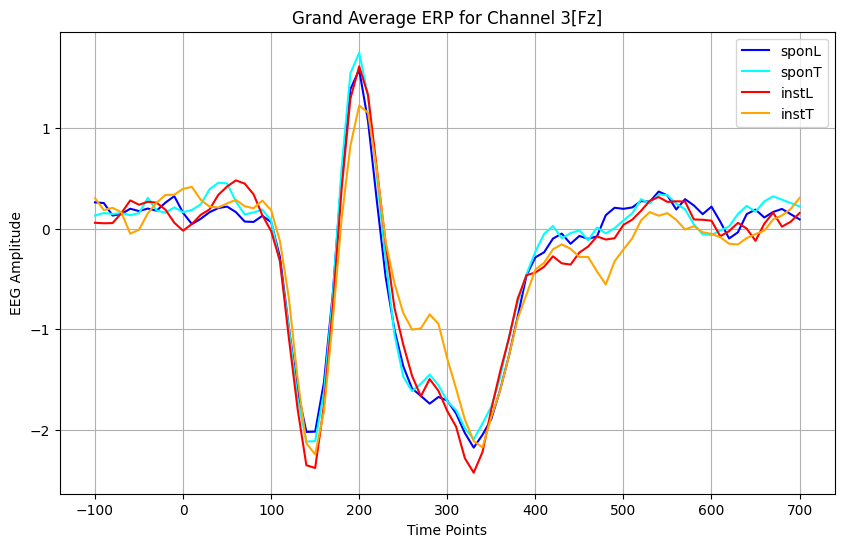

In [36]:
plot_erp(3)

In [37]:
def plot_all_channels():
    # Extract timestamps
    timestamps = epos[0][0][0][5][0]  # Assuming timestamps are the same for all players

    # Define the range for x-axis in milliseconds
    x_range = (-100, 700)
    timestamps_ms = np.array(timestamps)  # Convert timestamps to milliseconds

    # Filter the timestamps to include only the desired range
    valid_indices = np.where((timestamps_ms >= x_range[0]) & (timestamps_ms <= x_range[1]))[0]

    # Create subplots
    fig, axs = plt.subplots(6, 5, figsize=(20, 20))
    fig.suptitle('Grand Average ERP for All Channels')

    for channel_num in range(1, 31):
        grand_averages = grand_average(channel_num)

        row = (channel_num - 1) // 5
        col = (channel_num - 1) % 5
        ax = axs[row, col]

        color_cat={'sponL': 'blue', 'sponT': 'cyan' , 'instT': 'orange' , 'instL': 'red' }
        for category, data in grand_averages.items():
            ax.plot(timestamps_ms[valid_indices], np.array(data)[valid_indices], label=category, color=color_cat[category])

        ax.set_title(f'Channel {channel_num} [{ch_names[channel_num-1][0]}]')
        ax.set_xlabel('Time Points (ms)')
        ax.set_ylabel('EEG Amplitude')
        ax.legend()
        ax.grid(True)
        if channel_num == 1:
            ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#plot_all_channels()


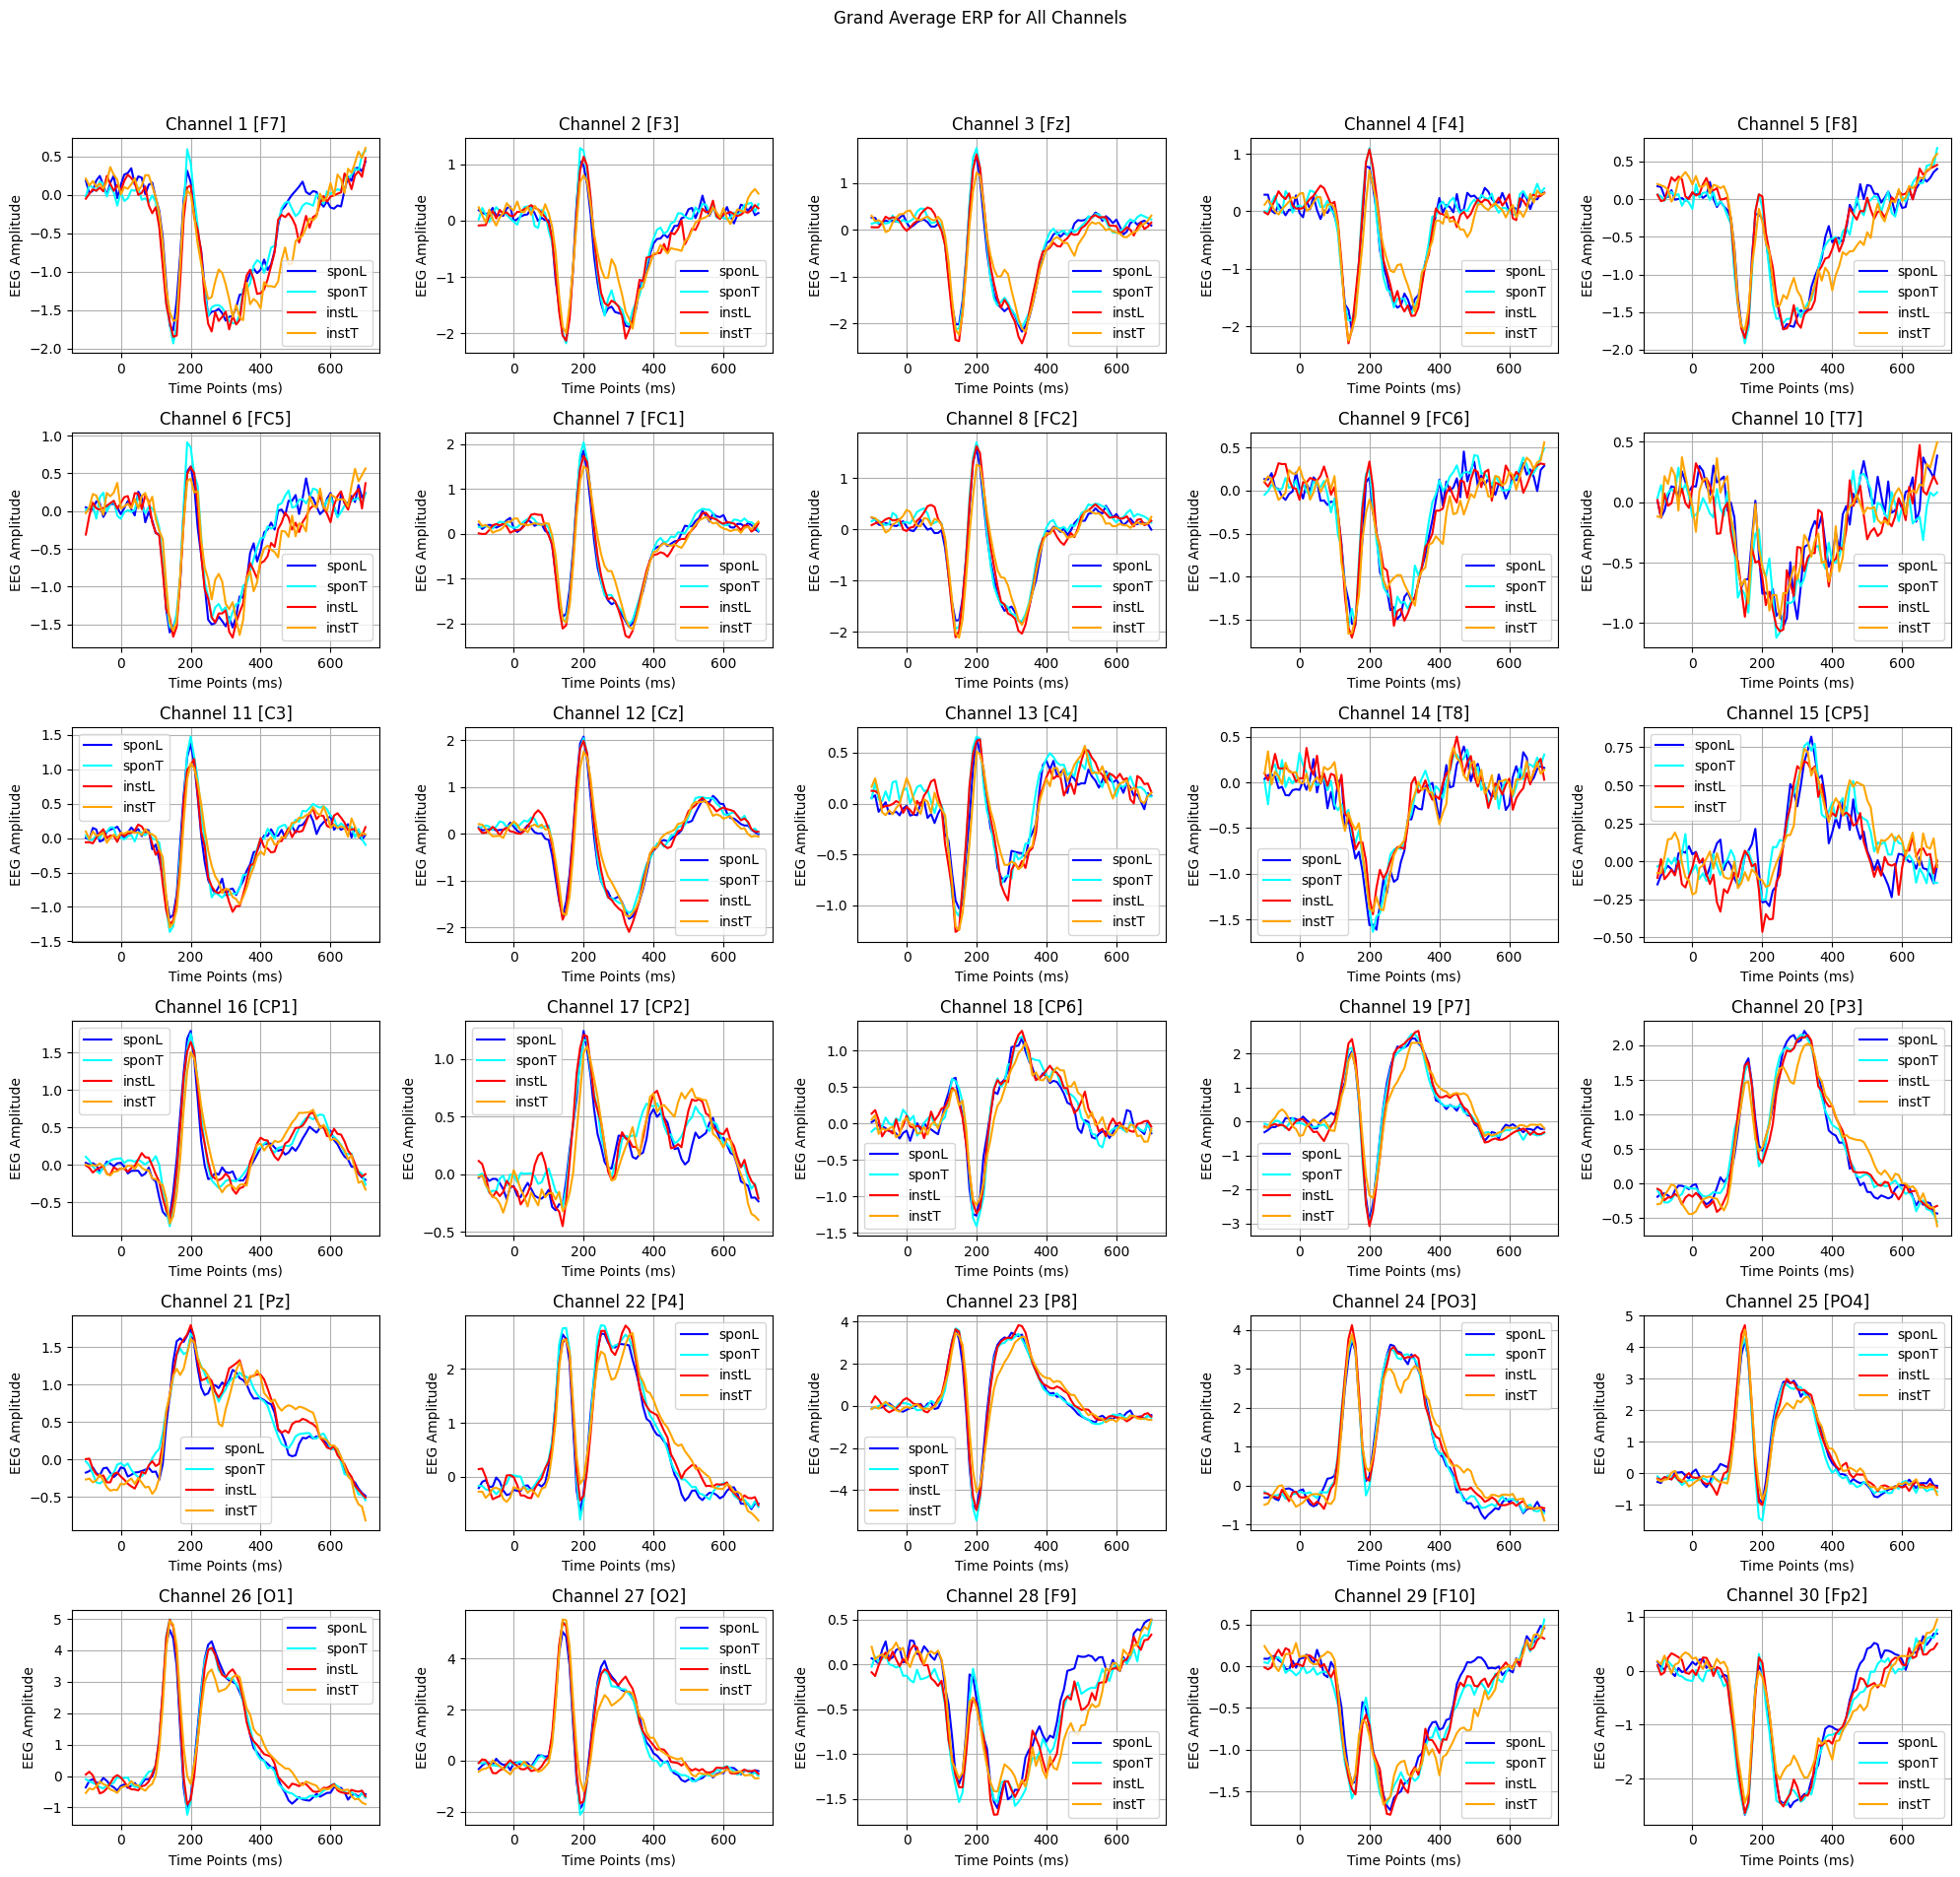

In [38]:
#processed_df.head(10)

In [39]:
from scipy.signal import welch
fs = 1000  # Sampling frequency (Hz)
player=0
round_val=1
trial_val=1
channel=1

df=player_df(player)

def power_spectrum_density(fs,player,round_val, trial_val, channel, df):
  #eeg_signal=df[(df['round'] == round_val) & (df['trial'] == trial_val)].iloc[:,channel+2][0]

  #for plotting grand average eeg for specific category
  category='sponL'
  eeg_signal=list(grand_average(1)[category][:])


  t = epos[player][0][0][5][0]

  # Compute the Power Spectral Density (PSD) using Welch's method
  f, Pxx = welch(eeg_signal, fs, nperseg=1024)

  # Plot the frequency spectrum
  plt.figure(figsize=(10, 5))
  plt.semilogy(f, Pxx)  # Use semilogy for better visualization of power spectrum
  plt.title('EEG Power Spectral Density')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Power Spectral Density (V^2/Hz)')
  plt.grid()
  plt.show()

In [40]:
from scipy.fft import fft, fftfreq

# Parameters
sampling_rate = 100  # Sampling rate in Hz
player=0
channel_num = 1  # Channel to analyze
round_val=1
trial_val=1
df=player_df(player)

def frequency_spectrum(sampling_rate, player, channel_num, round_val, trial_val, df):
  # Select the data for the specified channel
  eeg_data=df[(df['round'] == round_val) & (df['trial'] == trial_val)].iloc[:,channel+2][0]

  # Perform FFT
  n = len(eeg_data)
  yf = fft(eeg_data)
  xf = fftfreq(n, 1 / sampling_rate)

  # Plot the frequency spectrum
  plt.figure(figsize=(10, 6))
  plt.plot(xf, np.abs(yf))
  plt.title(f'Frequency Spectrum for Channel {channel_num} [{ch_names[channel_num-1][0]}][Round: {round_val} ,Trial: {trial_val}]')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Amplitude')
  plt.grid(True)
  plt.xlim(0, sampling_rate / 2)  # Plot only the positive frequencies
  plt.show()

In [41]:

def dataset(channel_num):
  eeg=[]
  category=[]
  for player in range(23):
    df=player_df(player)
    category.append(df[df.columns[2]].values)
    eeg.append(df[df.columns[channel_num+2]].values)
  data={'x':eeg, 'y':category}
  return pd.DataFrame(data)

# Function to expand the DataFrame
def expand_dataframe(df):
    expanded_rows = []
    for player in range(23):  # Iterate over each player
      if player==19:trials=483
      elif player==21:trials=482
      else:trials=484
      for trial in range(trials):  # Iterate over each trial (484 trials)
            x_values = df.iloc[player, 0][trial]  # Extract the list of 350 values
            y_value = df.iloc[player, 1][trial]   # Extract the corresponding y value
            expanded_rows.append({'x': x_values, 'y': y_value})
    return pd.DataFrame(expanded_rows)

In [42]:
#dataset(3)

In [43]:
#expand_dataframe(dataset(3))

# FEATURE EXTRACTION

1. ERP TIME WINDOW MEAN

P200, N200, N300, late positive
potential (LPP), and post-LPP intervals

P200:  170-200 ms

N200:  240-290ms

N300:  320 and 340

LPP:   450 to 490

POST LPP: 490 to 520 ms

In [44]:
def time_window(l,u):

      # Extract timestamps
      timestamps = epos[0][0][0][5][0]  # Assuming timestamps are the same for all players

      # Define the range for x-axis in milliseconds
      x_range = (l, u)
      timestamps_ms = np.array(timestamps)  # Convert timestamps to milliseconds

      # Filter the timestamps to include only the desired range
      valid_indices = np.where((timestamps_ms >= x_range[0]) & (timestamps_ms <= x_range[1]))[0]

      return valid_indices

def eeg_window(eeg, timewindow):
    eeg={eeg[i] for i in time_window(timewindow[0],timewindow[1])}
    return eeg

**Mean**

In [45]:
#applying the function in the dataset

def mean(list):
  mean=sum(list)/len(list)
  return mean

def erp_time_window(eeg_df, time_window):
  #eeg_df=dataset(channel_num)
  x=eeg_df['x']
  y=eeg_df['y']
  x_new=[]
  for i in range(len(x)):
    x_new.append(mean(eeg_window(x[i],time_window)))

  eeg_df_n=pd.DataFrame({'x':x_new, 'y':y})
  return eeg_df_n

In [46]:
#eeg_df=expand_dataframe(dataset(3))
#print(eeg_df)
#erp_time_window(eeg_df, [150,250])

**Variance**

In [47]:
def compute_variance(data):
    if not isinstance(data, list):
        raise ValueError("Input should be a list of continuous float values.")
    if not all(isinstance(x, float) for x in data):
        raise ValueError("All elements in the list should be floats.")

    return np.var(data)

def erp_var(eeg_df, time_window):
  x=eeg_df['x']
  y=eeg_df['y']
  x_new=[]
  for i in range(len(x)):
    x_new.append(compute_variance(list(eeg_window(x[i],time_window))))

  eeg_df_n=pd.DataFrame({'x':x_new, 'y':y})
  return eeg_df_n

In [48]:
#erp_var(expand_dataframe(dataset(3)),[250, 300])

**Wavelet Transform**

In [49]:
eeg_df=expand_dataframe(dataset(3))
eeg_df

x      y
0      [-5.539710998535156, -4.659396648406982, -4.15...  instL
1      [-1.2387791872024536, -2.4554600715637207, -0....  instT
2      [7.664554595947266, 1.350868582725525, 1.31465...  sponL
3      [-2.851555585861206, -0.7630741596221924, -1.5...  sponT
4      [-0.7059302926063538, 1.0232218503952026, 2.61...  sponT
...                                                  ...    ...
11124  [5.2822465896606445, 1.4454137086868286, 0.583...  instL
11125  [-2.4229331016540527, -6.3729143142700195, -10...  instL
11126  [-1.0254820585250854, -3.9521002769470215, -4....  sponT
11127  [-3.2671730518341064, -0.3191497325897217, -2....  sponT
11128  [-3.523390769958496, -5.006258964538574, -0.00...  instT

[11129 rows x 2 columns]

In [50]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.1 MB/s eta 0:00:00


In [52]:
#import pandas as pd
import pywt
#import numpy as np

# Define the wavelet and level of decomposition
wavelet = 'db4'
level = 7

# Create an empty list to store the extracted features
features_list = []

# Process each row separately
for index, row in eeg_df.iterrows():
    # Extract the EEG signal and category
    eeg_signal = row['x']
    category = row['y']

    # Perform the wavelet transform on the signal
    coeffs = pywt.wavedec(eeg_signal, wavelet, level=level)

    # Extract the approximation and detail coefficients
    A7 = coeffs[0]  # Approximation coefficients at level 7
    D7, D6, D5 = coeffs[1], coeffs[2], coeffs[3]  # Detail coefficients at levels 7, 6, and 5 respectively

    # Determine the maximum length of the coefficient arrays
    max_length = max(len(A7), len(D7), len(D6), len(D5))

    # Pad the coefficient arrays with NaN values to match the maximum length
    A7 = np.pad(A7, (0, max_length - len(A7)), mode='constant', constant_values=np.nan)
    D7 = np.pad(D7, (0, max_length - len(D7)), mode='constant', constant_values=np.nan)
    D6 = np.pad(D6, (0, max_length - len(D6)), mode='constant', constant_values=np.nan)
    D5 = np.pad(D5, (0, max_length - len(D5)), mode='constant', constant_values=np.nan)

    # Create a dictionary for the current category's features
    category_features_dict = {
        'A7': A7,
        'D7': D7,
        'D6': D6,
        'D5': D5,
        'Category': category
    }

    # Append the dictionary to the features list
    features_list.append(category_features_dict)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(features_list)

# The features_df now contains the extracted features for all categories
print(features_df)


                                                      A7  \
0      [-45.851699096521884, -47.701100245800866, -47...   
1      [-13.139782889376765, -13.940674212559646, -13...   
2      [22.98510448422, 23.928144937889346, 23.509903...   
3      [-22.586437281930515, -23.043594592353998, -23...   
4      [16.44022579220058, 17.885362125765173, 16.664...   
...                                                  ...   
11124  [20.63535130978409, 22.361146685601, 22.038716...   
11125  [-64.21705144674769, -66.73356982524065, -65.4...   
11126  [-31.154394422083413, -33.12553778301976, -32....   
11127  [-3.905837771895166, -4.240082940972557, -3.83...   
11128  [-7.893700922882041, -8.21487274852936, -8.000...   

                                                      D7  \
0      [0.19644081834073057, -0.17547219259521918, -1...   
1      [0.15810415128998392, -0.07107228894134265, -4...   
2      [-0.23522695733406157, -0.33182766077837844, 6...   
3      [-0.03314940474953938, -0.177544

In [53]:
features_df

A7  \
0      [-45.851699096521884, -47.701100245800866, -47...   
1      [-13.139782889376765, -13.940674212559646, -13...   
2      [22.98510448422, 23.928144937889346, 23.509903...   
3      [-22.586437281930515, -23.043594592353998, -23...   
4      [16.44022579220058, 17.885362125765173, 16.664...   
...                                                  ...   
11124  [20.63535130978409, 22.361146685601, 22.038716...   
11125  [-64.21705144674769, -66.73356982524065, -65.4...   
11126  [-31.154394422083413, -33.12553778301976, -32....   
11127  [-3.905837771895166, -4.240082940972557, -3.83...   
11128  [-7.893700922882041, -8.21487274852936, -8.000...   

                                                      D7  \
0      [0.19644081834073057, -0.17547219259521918, -1...   
1      [0.15810415128998392, -0.07107228894134265, -4...   
2      [-0.23522695733406157, -0.33182766077837844, 6...   
3      [-0.03314940474953938, -0.1775446138269311, -4...   
4      [-0.045370453531336646, 0.3109547593083639, 6....   
...                                                  ...   
11124  [-0.05536648748740541, -0.15411950414015674, 5...   
11125  [0.20461300405519092, -0.503437616180926, -16....   
11126  [-0.02226974744258044, -0.898175696242544, -11...   
11127  [0.4811611091175659, 1.0861282814523037, -3.58...   
11128  [0.1502617803879073, 0.4252332499686852, -1.44...   

                                                      D6  \
0      [0.11592959209617781, -0.037023707003161516, -...   
1      [-0.006803070906966149, -0.42991160326088196, ...   
2      [-0.3107494850246425, -0.6070052317991081, 5.9...   
3      [-0.06329752174625139, -0.1694440740293909, 0....   
4      [0.13894575393324227, 0.8372609645748831, 8.37...   
...                                                  ...   
11124  [-0.26849485697566133, -0.7144611091957737, 3....   
11125  [0.2963057291194787, 0.16491863036514676, -15....   
11126  [0.053319348592200985, -0.32805680509008794, -...   
11127  [0.38437171816074567, 0.40267553436260173, -8....   
11128  [0.29256158099944973, 0.860968646713216, -1.01...   

                                                      D5 Category  
0      [-0.13384811289992704, -0.4927359469426507, -3...    instL  
1      [-0.020403468647272546, -0.07094780992274871, ...    instT  
2      [0.16091220293086966, 0.8626301273587871, 5.96...    sponL  
3      [-0.02380608411165376, -0.04642547409484382, 0...    sponT  
4      [-0.19407548684000683, -0.500113740981231, 3.3...    sponT  
...                                                  ...      ...  
11124  [0.01464819993532208, 0.40864109630536793, 3.3...    instL  
11125  [0.17276682154195694, 0.14269334634104808, -7....    instL  
11126  [0.10433141357027245, 0.27811849210135675, -1....    sponT  
11127  [-0.12282862355811983, -0.8588485815385374, -1...    sponT  
11128  [-0.19679076670315265, -0.7633789156227714, -2...    instT  

[11129 rows x 5 columns]

In [76]:
def plot_wavelet_features(features_df):
    # Create a list of feature names
    feature_names = ['A7', 'D7', 'D6', 'D5']
    f_n=['A7 [delta]', 'D7 [theta]', 'D6 [alpha]', 'D5 [beta]']
    # Create a figure and a set of subplots in a 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=(9, 6))

     # Flatten the axs array for easier iteration
    axs = axs.flatten()

    # Define time points from -100 to 700 with an interval of 10 ms
    time_points = np.arange(-100, 701, 10)

    # Iterate through each feature and plot
    for i, feature in enumerate(feature_names):
        ax = axs[i]

        # Plot each condition
        for category in ['instT', 'instL', 'sponT', 'sponL']:
            category_data = features_df[features_df['Category'] == category]

            # Ensure there are no missing values in the data
            if not category_data[feature].empty:
                # Convert list of coefficients to a DataFrame if needed
                feature_data = pd.DataFrame(category_data[feature].tolist())

                # Compute the mean feature values
                mean_feature = feature_data.mean(axis=0)

                # Ensure mean_feature is the same length as time_points
                if len(mean_feature) > len(time_points):
                    mean_feature = mean_feature[:len(time_points)]
                elif len(mean_feature) < len(time_points):
                    mean_feature = np.pad(mean_feature, (0, len(time_points) - len(mean_feature)), 'constant', constant_values=np.nan)

                ax.plot(time_points, mean_feature, label=category)

        # Set the title and labels
        ax.set_title(f'{f_n[i]}')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('EEG Amplitude (µV)')
        ax.legend(loc='best')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

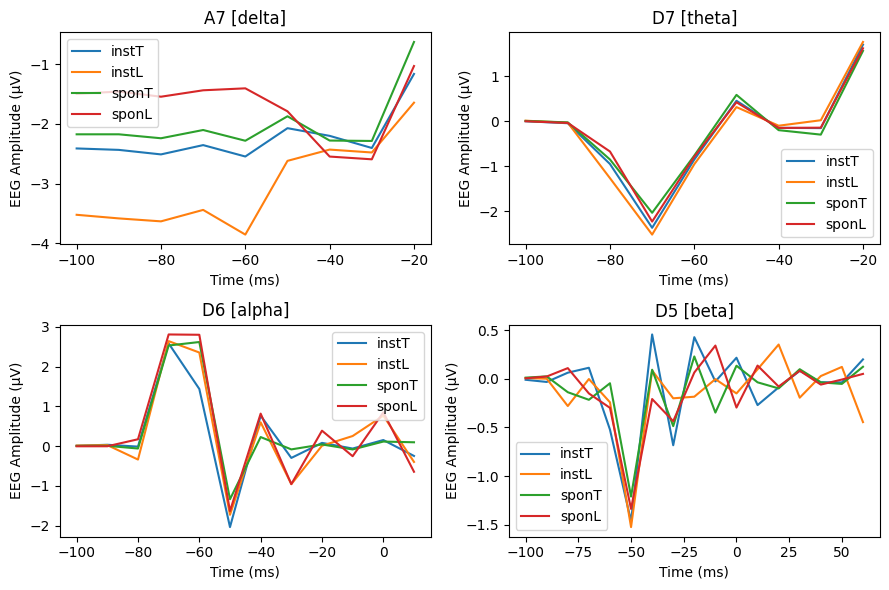

In [77]:
plot_wavelet_features(features_df)

# CLASSIFICATION MODEL

In [ ]:
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from itertools import combinations

**LDA**

In [ ]:
def model_lda(df):
   # Extract features and target
    X = df[['x']]  # Ensure X is a 2D array with one column
    y = df['y']

    # Define the k-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # Define the categories
    categories = df['y'].unique()

    # Generate all possible combinations of pairs from four categories
    pairs = list(combinations(categories, 2))

    # Prepare to store results
    metrics = {
        'combination': [],
        'confusion_matrix': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    # Loop through each combination of categories
    for cat1, cat2 in pairs:
        # Filter data for the current combination
        mask = (y == cat1) | (y == cat2)
        X_filtered = X[mask].values.reshape(-1, 1)
        y_filtered = y[mask]

        # Encode categories as integers
        y_filtered = y_filtered.map({cat1: 0, cat2: 1})

        # Initialize variables to accumulate results
        all_y_true = []
        all_y_pred = []

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X_filtered):
            X_train, X_test = X_filtered[train_index], X_filtered[test_index]
            y_train, y_test = y_filtered.iloc[train_index], y_filtered.iloc[test_index]

            # Train the LDA model
            lda = LinearDiscriminantAnalysis()
            lda.fit(X_train, y_train)

            # Predict on the test set
            y_pred = lda.predict(X_test)

            # Accumulate true and predicted values
            all_y_true.extend(y_test)
            all_y_pred.extend(y_pred)

        # Calculate evaluation metrics
        cm = confusion_matrix(all_y_true, all_y_pred)
        accuracy = accuracy_score(all_y_true, all_y_pred)
        precision = precision_score(all_y_true, all_y_pred, zero_division=0)
        recall = recall_score(all_y_true, all_y_pred, zero_division=0)
        f1 = f1_score(all_y_true, all_y_pred, zero_division=0)

        # Store the results
        metrics['combination'].append((cat1, cat2))
        metrics['confusion_matrix'].append(cm)
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)

    # Print the results
    r=[]
    for i in range(len(metrics['combination'])):
        #print(f"Combination: {metrics['combination'][i]}")
        #print(f"Confusion Matrix:\n{metrics['confusion_matrix'][i]}")
        #print(f"Accuracy: {metrics['accuracy'][i]:.4f}")
        #print(f"Precision: {metrics['precision'][i]:.4f}")
        #print(f"Recall: {metrics['recall'][i]:.4f}")
        #print(f"F1 Score: {metrics['f1_score'][i]:.4f}")
        #print("-" * 30)
        r.extend([metrics['combination'][i], metrics['accuracy'][i]])
    #print(r)
    # Compute and print the correlation matrix for the categories
   # y_dummies = pd.get_dummies(df['y'])
   # corr_matrix = y_dummies.corr()
    #print("Correlation Matrix for the 4 Categories:")
    #print(corr_matrix)
    return r


P200: 170-200 ms

N200: 240-290ms

N300: 320 and 340

LPP: 450 to 490

POST LPP: 490 to 520 ms

In [ ]:
channel_list=[x[0] for x in ch_names]
channel_dict = {idx+1: name for idx, name in enumerate(channel_list)}
print(channel_dict)

{1: 'F7', 2: 'F3', 3: 'Fz', 4: 'F4', 5: 'F8', 6: 'FC5', 7: 'FC1', 8: 'FC2', 9: 'FC6', 10: 'T7', 11: 'C3', 12: 'Cz', 13: 'C4', 14: 'T8', 15: 'CP5', 16: 'CP1', 17: 'CP2', 18: 'CP6', 19: 'P7', 20: 'P3', 21: 'Pz', 22: 'P4', 23: 'P8', 24: 'PO3', 25: 'PO4', 26: 'O1', 27: 'O2', 28: 'F9', 29: 'F10', 30: 'Fp2'}


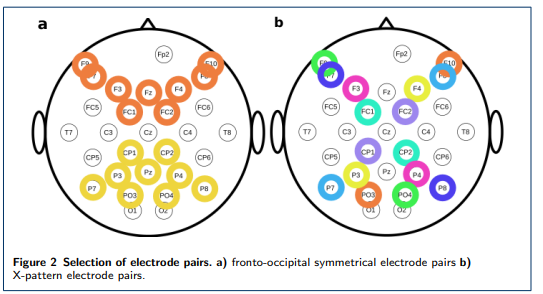

In [ ]:
selected_channels=[1,2,3, 4, 5, 7, 8, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29]

In [ ]:
#for p200

p200_average=[]
for i in selected_channels:
    r=model_lda(erp_time_window(expand_dataframe(dataset(i)), [170,200]))
    p200_average.append(r)

In [ ]:

def erp_avg_df(list, clist):
      # Define the categories based on your description
    categories = ['instL_instT', 'instL_sponL', 'instL_sponT',
                  'instT_sponL', 'instT_sponT', 'sponL_sponT']

    # Initialize an empty list to store the rows
    rows = []

    # Iterate through each channel in the data list
    for channel_data in list:
        # Extract the average values (odd indices)
        avg_values = channel_data[1::2]

        # Create a dictionary with categories as keys and average values as values
        row_dict = dict(zip(categories, avg_values))

        # Append the row dictionary to the rows list
        rows.append(row_dict)

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(rows)

    # Add a 'Channel' column to identify each row
    #df['Channel'] = [f'Channel_{i+1}' for i in range(len(rows))]
    df['Channel'] = clist[:len(rows)]
    # Set 'Channel' as the index
    df.set_index('Channel', inplace=True)

    return df

In [ ]:
def plot_bar_scatter(df):
    # Calculate the mean of each category
    mean_values = df.mean()

    # Calculate the percentage values for each category
    percentage_df = df.apply(lambda x: (x / x.sum()) * 100, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 8))

    # Bar plot for the mean values
    ax.bar(mean_values.index, mean_values, color='skyblue', alpha=0.7, label='Mean')

    categories=['instL_instT', 'instT_sponT', 'instT_sponL',  'instL_sponT', 'instL_sponL', 'sponL_sponT']
    # Scatter plot for each category's values
    for category in categories:              #df.columns:
        ax.scatter([category] * len(df), df[category], alpha=0.6, label=category, s=50)

    # Setting y-axis limit
    ax.set_ylim(0.3, 0.8)

    # Adding horizontal grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Setting labels and title
    ax.set_xlabel('Condition Contrast')
    ax.set_ylabel('Classification Accuracy')
    ax.set_title('Bar and Scatter Plot of Categories')
    ax.legend()

    # Display the plot
    plt.show()


In [ ]:
erp_avg_df(p200_average, selected_channels)

instL_instT  instL_sponL  instL_sponT  instT_sponL  instT_sponT  \
Channel                                                                    
1           0.480144     0.523208     0.520412     0.525005     0.520844   
2           0.497574     0.524906     0.521955     0.525760     0.522731   
3           0.514465     0.525094     0.522642     0.526703     0.529250   
4           0.524169     0.524151     0.522642     0.521042     0.529593   
5           0.507278     0.524717     0.522298     0.524816     0.520158   
7           0.510512     0.524340     0.521098     0.528024     0.531481   
8           0.524349     0.525094     0.522642     0.524816     0.531481   
16          0.511770     0.523585     0.522470     0.527081     0.524447   
17          0.515723     0.524717     0.522298     0.522174     0.516727   
19          0.516083     0.524906     0.522298     0.521419     0.526849   
20          0.479964     0.523774     0.522985     0.522929     0.522731   
21          0.518239     0.524717     0.519039     0.518588     0.520501   
22          0.514286     0.525094     0.519211     0.526514     0.530451   
23          0.530997     0.521321     0.521441     0.535950     0.542803   
24          0.490746     0.525094     0.520240     0.524439     0.518099   
25          0.506199     0.525094     0.518010     0.524627     0.531481   
28          0.492722     0.524528     0.521441     0.523495     0.521530   
29          0.483917     0.522642     0.522298     0.525571     0.522045   

         sponL_sponT  
Channel               
1           0.547448  
2           0.547448  
3           0.547628  
4           0.547628  
5           0.547448  
7           0.547628  
8           0.547628  
16          0.547807  
17          0.547628  
19          0.547448  
20          0.547268  
21          0.547628  
22          0.547628  
23          0.547628  
24          0.547448  
25          0.544752  
28          0.547628  
29          0.547628

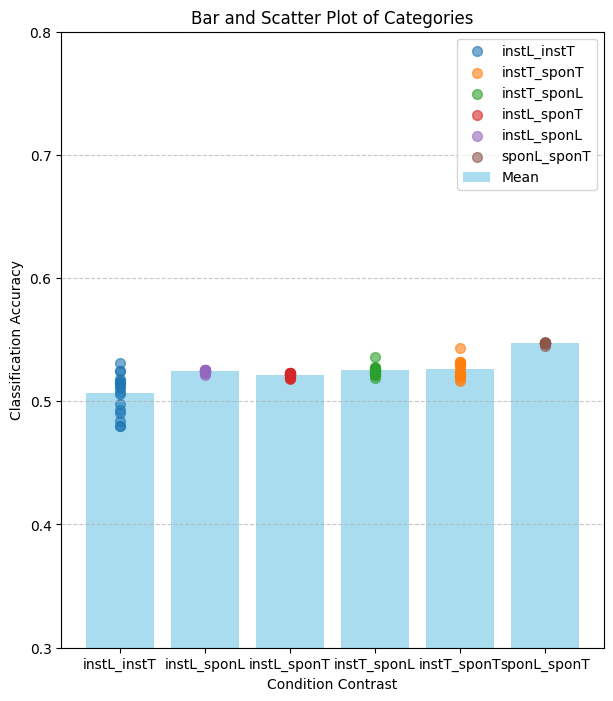

In [ ]:
plot_bar_scatter(erp_avg_df(p200_average, selected_channels))

In [ ]:
n200_average=[]
for i in selected_channels:
    r=model_lda(erp_time_window(expand_dataframe(dataset(i)), [240,290]))
    n200_average.append(r)

In [ ]:
erp_avg_df(n200_average, selected_channels)

instL_instT  instL_sponL  instL_sponT  instT_sponL  instT_sponT  \
Channel                                                                    
1           0.520755     0.525283     0.522985     0.526703     0.521359   
2           0.526325     0.522830     0.521955     0.533497     0.528564   
3           0.518239     0.523774     0.522642     0.532931     0.527878   
4           0.513387     0.525472     0.522642     0.523306     0.526505   
5           0.510332     0.525283     0.522642     0.524816     0.523932   
7           0.516262     0.523396     0.522642     0.531610     0.529937   
8           0.510512     0.522830     0.522985     0.527458     0.524618   
16          0.488949     0.524906     0.522127     0.524061     0.520672   
17          0.483738     0.524906     0.522642     0.525571     0.522731   
19          0.512848     0.523774     0.522642     0.530289     0.526849   
20          0.499191     0.524151     0.522985     0.526326     0.518271   
21          0.500449     0.524906     0.522642     0.524439     0.521702   
22          0.519856     0.524906     0.522127     0.530100     0.534225   
23          0.535490     0.525283     0.522642     0.545197     0.546749   
24          0.509075     0.523585     0.522642     0.521042     0.526849   
25          0.511411     0.522075     0.522642     0.525760     0.521359   
28          0.511590     0.524528     0.521955     0.522363     0.523589   
29          0.502965     0.524717     0.521784     0.524061     0.522388   

         sponL_sponT  
Channel               
1           0.547628  
2           0.548167  
3           0.547628  
4           0.547628  
5           0.547628  
7           0.547628  
8           0.547628  
16          0.547628  
17          0.547628  
19          0.547628  
20          0.547628  
21          0.547628  
22          0.547628  
23          0.547628  
24          0.547628  
25          0.547448  
28          0.547628  
29          0.547628

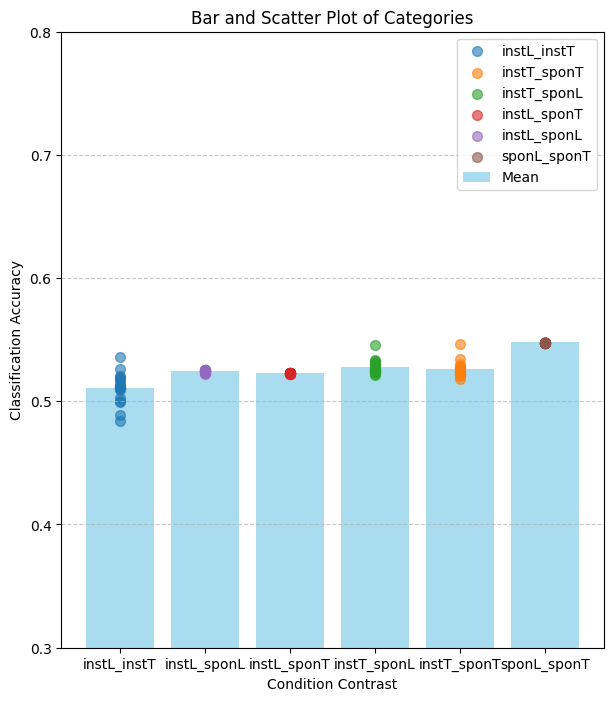

In [ ]:
plot_bar_scatter(erp_avg_df(n200_average, selected_channels))

In [ ]:
n300_average=[]
for i in selected_channels:
    r=model_lda(erp_time_window(expand_dataframe(dataset(i)), [320,340]))
    n300_average.append(r)

In [ ]:
erp_avg_df(n300_average, selected_channels)

instL_instT  instL_sponL  instL_sponT  instT_sponL  instT_sponT  \
Channel                                                                    
1           0.490207     0.521509     0.522642     0.525571     0.522731   
2           0.505840     0.525094     0.520412     0.524816     0.522560   
3           0.504403     0.525283     0.520240     0.525005     0.522903   
4           0.505301     0.521698     0.521784     0.525005     0.522217   
5           0.495957     0.524528     0.522642     0.524816     0.522388   
7           0.504223     0.523774     0.523156     0.524627     0.522388   
8           0.497574     0.526604     0.523156     0.525005     0.522731   
16          0.490027     0.524717     0.520412     0.524816     0.521530   
17          0.492183     0.525094     0.521955     0.525005     0.522560   
19          0.507996     0.525283     0.522470     0.525005     0.522731   
20          0.495238     0.525094     0.522642     0.523684     0.522560   
21          0.493980     0.525283     0.522470     0.525005     0.522217   
22          0.498652     0.519623     0.521612     0.525571     0.522731   
23          0.510332     0.533019     0.523328     0.525382     0.522731   
24          0.505481     0.524906     0.522985     0.525193     0.521359   
25          0.507637     0.524906     0.521269     0.525005     0.522731   
28          0.483199     0.523208     0.523156     0.525193     0.522903   
29          0.479066     0.524717     0.522813     0.524816     0.521873   

         sponL_sponT  
Channel               
1           0.547807  
2           0.547628  
3           0.547628  
4           0.547628  
5           0.547628  
7           0.547628  
8           0.547628  
16          0.547628  
17          0.547628  
19          0.547448  
20          0.547628  
21          0.547628  
22          0.547807  
23          0.547628  
24          0.547628  
25          0.547628  
28          0.547807  
29          0.547268

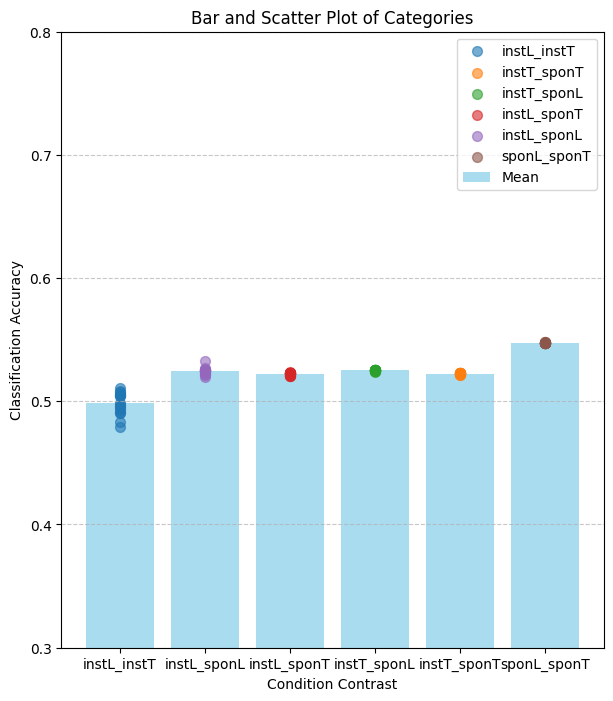

In [ ]:
plot_bar_scatter(erp_avg_df(n300_average, selected_channels))

In [ ]:
lpp_average=[]
for i in selected_channels:
    r=model_lda(erp_time_window(expand_dataframe(dataset(i)), [450,490]))
    lpp_average.append(r)

In [ ]:
erp_avg_df(lpp_average, selected_channels)

instL_instT  instL_sponL  instL_sponT  instT_sponL  instT_sponT  \
Channel                                                                    
1           0.525427     0.524340     0.522127     0.535007     0.543489   
2           0.516083     0.524340     0.526587     0.528402     0.527020   
3           0.503145     0.523962     0.523156     0.526514     0.523246   
4           0.511590     0.523585     0.523499     0.528590     0.529250   
5           0.526864     0.524906     0.522470     0.528213     0.532510   
7           0.487152     0.524151     0.527444     0.525193     0.523417   
8           0.488050     0.522642     0.527444     0.524250     0.522731   
16          0.509973     0.524906     0.522642     0.521230     0.523761   
17          0.516083     0.524906     0.522470     0.529911     0.530280   
19          0.504043     0.522830     0.523671     0.528213     0.528564   
20          0.514825     0.525283     0.522813     0.524816     0.533196   
21          0.515723     0.526415     0.521098     0.526892     0.533539   
22          0.519137     0.526415     0.521441     0.543121     0.531824   
23          0.507637     0.528679     0.525557     0.529534     0.535769   
24          0.513567     0.522264     0.521784     0.536516     0.530108   
25          0.496316     0.524340     0.523328     0.526514     0.529593   
28          0.520036     0.527925     0.522642     0.532176     0.530108   
29          0.528661     0.525094     0.521269     0.532365     0.530623   

         sponL_sponT  
Channel               
1           0.547628  
2           0.547448  
3           0.547628  
4           0.546729  
5           0.546729  
7           0.547628  
8           0.547628  
16          0.547628  
17          0.548167  
19          0.547628  
20          0.547088  
21          0.547628  
22          0.547807  
23          0.547628  
24          0.547628  
25          0.547628  
28          0.548167  
29          0.547268

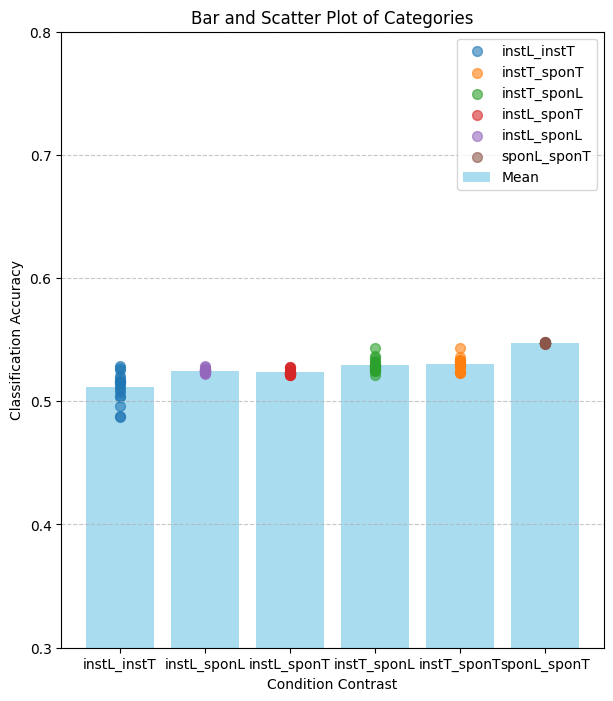

In [ ]:
plot_bar_scatter(erp_avg_df(lpp_average, selected_channels))

In [ ]:
postlpp_average=[]
for i in selected_channels:
    r=model_lda(erp_time_window(expand_dataframe(dataset(i)), [490,520]))
    postlpp_average.append(r)

In [ ]:
erp_avg_df(postlpp_average, selected_channels)

instL_instT  instL_sponL  instL_sponT  instT_sponL  instT_sponT  \
Channel                                                                    
1           0.506379     0.526604     0.522298     0.528402     0.531824   
2           0.481402     0.523585     0.521955     0.521042     0.521873   
3           0.503504     0.525472     0.521098     0.525193     0.521187   
4           0.506559     0.524906     0.522813     0.520853     0.521702   
5           0.513567     0.521321     0.521612     0.527647     0.525476   
7           0.486433     0.522642     0.522298     0.523872     0.524104   
8           0.484996     0.524906     0.522127     0.525005     0.521016   
16          0.513208     0.527358     0.522813     0.533119     0.520844   
17          0.505121     0.526792     0.522470     0.531421     0.519815   
19          0.508715     0.524906     0.522642     0.523684     0.520501   
20          0.517520     0.522264     0.522642     0.541423     0.526334   
21          0.516262     0.527358     0.526587     0.534629     0.525991   
22          0.506739     0.531132     0.523671     0.531044     0.529250   
23          0.486433     0.525283     0.521441     0.528779     0.521530   
24          0.507457     0.520189     0.521955     0.527835     0.525305   
25          0.485175     0.521887     0.520069     0.522363     0.521187   
28          0.511411     0.529057     0.522470     0.530289     0.527878   
29          0.518419     0.530000     0.522127     0.535950     0.523761   

         sponL_sponT  
Channel               
1           0.547268  
2           0.547628  
3           0.547628  
4           0.547628  
5           0.546909  
7           0.547628  
8           0.547628  
16          0.547088  
17          0.547807  
19          0.547628  
20          0.547088  
21          0.547268  
22          0.547628  
23          0.547628  
24          0.547088  
25          0.547807  
28          0.548886  
29          0.547268

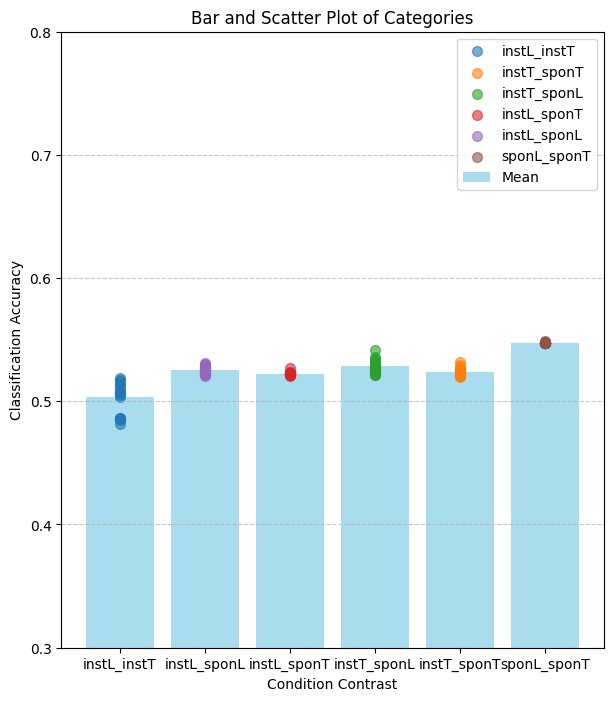

In [ ]:
plot_bar_scatter(erp_avg_df(postlpp_average, selected_channels))

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
def model_svm(df):
    # Extract features and target
    X = df[['x']]  # Ensure X is a 2D array with one column
    y = df['y']

    # Define the k-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # Define the categories
    categories = df['y'].unique()

    # Generate all possible combinations of pairs from four categories
    pairs = list(combinations(categories, 2))

    # Prepare to store results
    metrics = {
        'combination': [],
        'confusion_matrix': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    # Loop through each combination of categories
    for cat1, cat2 in pairs:
        # Filter data for the current combination
        mask = (y == cat1) | (y == cat2)
        X_filtered = X[mask].values.reshape(-1, 1)
        y_filtered = y[mask]

        # Encode categories as integers
        y_filtered = y_filtered.map({cat1: 0, cat2: 1})

        # Initialize variables to accumulate results
        all_y_true = []
        all_y_pred = []

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X_filtered):
            X_train, X_test = X_filtered[train_index], X_filtered[test_index]
            y_train, y_test = y_filtered.iloc[train_index], y_filtered.iloc[test_index]

            # Train the SVM model
            svm = SVC(kernel='linear')
            svm.fit(X_train, y_train)

            # Predict on the test set
            y_pred = svm.predict(X_test)

            # Accumulate true and predicted values
            all_y_true.extend(y_test)
            all_y_pred.extend(y_pred)

        # Calculate evaluation metrics
        cm = confusion_matrix(all_y_true, all_y_pred)
        accuracy = accuracy_score(all_y_true, all_y_pred)
        precision = precision_score(all_y_true, all_y_pred, zero_division=0)
        recall = recall_score(all_y_true, all_y_pred, zero_division=0)
        f1 = f1_score(all_y_true, all_y_pred, zero_division=0)

        # Store the results
        metrics['combination'].append((cat1, cat2))
        metrics['confusion_matrix'].append(cm)
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)

    # Prepare the results in the required format
    results = []
    for i in range(len(metrics['combination'])):
        results.extend([metrics['combination'][i], metrics['accuracy'][i]])

    return results


In [ ]:
selected_channels=[1,2,3, 4, 5, 7, 8, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29]

In [ ]:
n200_var=[]
for i in selected_channels:
    r=model_svm(erp_var(expand_dataframe(dataset(i)),[240, 290]))
    n200_var.append(r)

In [ ]:
e=erp_avg_df(n200_var, selected_channels)
e

In [ ]:
plot_bar_scatter(e)